# 0. Intro

Frederico Furst Bittencourt

2022/fev/02

Espapo ou çotem

## 0.0.Consideracoes preliminares

Todo o notebook está bem bagunçado, mas as figuras estão corretas, e dão (algum) insight sobre o fenômeno.

Taken from https://github.com/lyes-khacef/GPU-SOM and modded by yours truly

Now mixing it up with data from a notebook in the ChaosDoc folder

Also, also mixing it up with a newly idealized set of simulations, which were designed with the peculiarity of the instantaneous application of force.

There would of course be two sets of boundary conditions either way, and the primary conjectures point to our questioning of quasi-static approximations as applied to these tests.

# 1. Prep

## Actual Prep code to be run

### GPUtil

In [ ]:
!pip install GPUtil

  Created wheel for GPUtil: filename=GPUtil-1.4.0-py3-none-any.whl size=7411 sha256=93b072238465d6de3ce75a52314f230f3b9ab47cbcecb267ef77162ad88f95ce
  Stored in directory: /root/.cache/pip/wheels/6e/f8/83/534c52482d6da64622ddbf72cd93c35d2ef2881b78fd08ff0c
Successfully built GPUtil


### From imports.py

In [ ]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import timeit

# import packages
import os, sys, humanize, psutil, GPUtil

# diable gpu
#os.environ["CUDA_VISIBLE_DEVICES"]="-1"

# disable tensorflow logs
"""
0 = all messages are logged (default behavior)
1 = INFO messages are not printed
2 = INFO and WARNING messages are not printed
3 = INFO, WARNING, and ERROR messages are not printed
"""
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1' 

# import tensorflow
import tensorflow as tf
print("Tensorflow version = ", tf.__version__)
if tf.executing_eagerly():
    print("Eager execution!")
#tf.debugging.set_log_device_placement(True)

Tensorflow version =  2.8.0
Eager execution!


### From gpu_check.py

Check for GPUs

In [ ]:
def gpu_report():
    print("CPU RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ))
    GPUs = GPUtil.getGPUs()
    print(GPUs)
    for i, gpu in enumerate(GPUs):
        print('GPU {:d} ... Mem Free: {:.0f}MB / {:.0f}MB | Utilization {:3.0f}%'.format(i, gpu.memoryFree, gpu.memoryTotal, gpu.memoryUtil*100))
# why not eh
gpu_report()

CPU RAM Free: 12.6 GB
GPU 0 ... Mem Free: 11441MB / 11441MB | Utilization   0%


## 2. Uploading file

In [ ]:
from google.colab import files
uploaded_file = files.upload()

Saving im78552_ohc_soft_forca_1e8_aplic_degrau.csv to im78552_ohc_soft_forca_1e8_aplic_degrau (1).csv
Saving im78552_ohc_soft_forca_1e9_aplic_degrau.csv to im78552_ohc_soft_forca_1e9_aplic_degrau.csv


In [ ]:
import pandas as pd
import io

In [ ]:
uploaded_file.keys()

dict_keys(['im78552_ohc_soft_forca_1e8_aplic_degrau.csv', 'im78552_ohc_soft_forca_1e9_aplic_degrau.csv'])

In [ ]:
df8 = pd.read_fwf(
    io.BytesIO(uploaded_file['im78552_ohc_soft_forca_1e8_aplic_degrau.csv']), #changed this run
    header=[1,2,3,4],
    skip_blank_lines=True)

In [ ]:
df9 = pd.read_fwf(
    io.BytesIO(uploaded_file['im78552_ohc_soft_forca_1e9_aplic_degrau.csv']),
    header=[1,2,3,4],
    skip_blank_lines=True)

### Get Column names for visualizations

In [ ]:
from google.colab import data_table
data_table.enable_dataframe_formatter()

In [ ]:
df9.head()

Unnamed: 0_level_0 COMP-OHT-QI-1_ORI  ...                                    
  Unnamed: 0_level_1 -3) PI: COMP-OHT-  ...                                    
  Unnamed: 0_level_2 QI-1 E: 497 IP: 1  ... QI-1 E: 29426 IP: QI-1 E: 29427 IP:
                   X                _1  ...               1_1               1_1
0           0.000000      0.000000e+00  ...      0.000000e+00      0.000000e+00
1           0.001284     -2.635900e-08  ...      0.000000e+00      0.000000e+00
2           0.002567     -1.191120e-06  ...      8.994320e-10     -3.082830e-12
3           0.003851     -9.428570e-06  ...      1.876610e-08     -2.696030e-10
4           0.005135     -3.975140e-05  ...      1.392720e-07     -4.027590e-09

[5 rows x 961 columns]

In [ ]:
df8.columns

MultiIndex([('Unnamed: 0_level_0', 'Unnamed: 0_level_1', ...),
            ( '_S:S11 (ASSEMBLY_',  'COMP-OHT-QI-1_ORI', ...),
            ( '_S:S11 (ASSEMBLY_',  'COMP-OHT-QI-1_ORI', ...),
            ( '_S:S11 (ASSEMBLY_',  'COMP-OHT-QI-1_ORI', ...),
            ( '_S:S11 (ASSEMBLY_',  'COMP-OHT-QI-1_ORI', ...),
            ( '_S:S11 (ASSEMBLY_',  'COMP-OHT-QI-1_ORI', ...),
            ( '_S:S11 (ASSEMBLY_',  'COMP-OHT-QI-1_ORI', ...),
            ( '_S:S11 (ASSEMBLY_',  'COMP-OHT-QI-1_ORI', ...),
            ( '_S:S11 (ASSEMBLY_',  'COMP-OHT-QI-1_ORI', ...),
            ( '_S:S11 (ASSEMBLY_',  'COMP-OHT-QI-1_ORI', ...),
            ...
            ( 'COMP-OHT-QI-1_ORI',  '-3) PI: COMP-OHT-', ...),
            ( 'COMP-OHT-QI-1_ORI',  '-3) PI: COMP-OHT-', ...),
            ( 'COMP-OHT-QI-1_ORI',  '-3) PI: COMP-OHT-', ...),
            ( 'COMP-OHT-QI-1_ORI',  '-3) PI: COMP-OHT-', ...),
            ( 'COMP-OHT-QI-1_ORI',  '-3) PI: COMP-OHT-', ...),
            ( 'COMP-OHT-QI-1_ORI',  '-3

In [ ]:
npdf8 = np.array(df8[:800],dtype=float).transpose()
npdf9 = np.array(df9[:800],dtype=float).transpose()

In [ ]:
npdf8 = npdf8[1:]
npdf9 = npdf9[1:]

# 3. Boilerplate

### UNUSED _ From data_load.py

In [ ]:
##
## UNUSED 1 ?
##

# imports
#from imports import *
from tensorflow.keras.datasets import mnist

# fuction to load data from file
def load_data(name): 
    data = np.load(name, allow_pickle=True)
    print("Data.shape = ", data.shape)
    return data

def get_dataset(train_data, label_data, test_data):
    # importing dataset
    (x_train_all, index_train_all), (x_test_all, index_test_all) = mnist.load_data()
    x_train_all = x_train_all.astype('float32') / 255.
    x_test_all = x_test_all.astype('float32') / 255.
    x_train_all = x_train_all.reshape((60000, 784))
    x_test_all = x_test_all.reshape((10000, 784))

    # constructing dataset
    x_train = np.copy(x_train_all[:train_data,:])
    index_train = np.copy(index_train_all[:train_data])
    x_label = np.copy(x_train_all[:label_data,:])
    index_label = np.copy(index_train_all[:label_data])
    x_test = np.copy(x_test_all[:test_data,:])
    index_test = np.copy(index_test_all[:test_data])

    return x_train, index_train, x_label, index_label, x_test, index_test, label_data

## Models

### From file tf_ksom.py

#### KSOM_3D definition

In [ ]:
class KSOM_3D():
    def __init__(self, m, n, o, dim):
        self.m = m
        self.n = n
        self.o = o
        self.dim = dim
        self.map_wgt =  tf.Variable(
                            tf.random.uniform(
                                shape = [m*n*o, dim],
                                minval = 0.0,
                                maxval = 1.0,
                                dtype = tf.float32,
                                seed = 23
                            )
                        )
        self.map_loc =  tf.constant(
                            np.array(
                                list(self.neuron_locs(m, n, o))
                            )
                        )

    def neuron_locs(self, m, n, o):
        # nested iterations over both dimensions to yield one by one the 2-d locations of the individual neurons in the SOM
        for i in range(m):
            for j in range(n):
                for k in range(o):
                    yield np.array([i,j,k], dtype=np.float32)
    
    def compute_winner(self, sample):
            self.sample = sample

            # compute the squared euclidean distance between the input and the neurons
            self.squared_distance = tf.reduce_sum(
                                        tf.square(
                                            tf.subtract(
                                                self.map_wgt, # [m*n*o, dim]
                                                tf.expand_dims(
                                                    self.sample, # [dim] -> [1, dim]
                                                    axis=0
                                                )
                                            )
                                        ), 
                                        axis=1
                                    )
            
            # find the bmu's index
            self.bmu_idx =  tf.argmin(
                                    input=self.squared_distance, 
                                    axis=0
                                )
            
            # extract the bmu's 2-d location
            self.bmu_loc =  tf.gather(
                                self.map_loc, 
                                self.bmu_idx
                            )
    
    def update_network(self, epsilon, eta):
        # compute the squared manhattan distance between the bmu and the neurons
        self.bmu_distance_squares = tf.reduce_sum(
                                        tf.square(
                                            tf.subtract(
                                                self.map_loc, # [m*n*o, 2]
                                                tf.expand_dims(
                                                    self.bmu_loc, # [2] -> [1, 2]
                                                    axis=0
                                                )
                                            )
                                        ), 
                                        axis=1
                                    )

        # compute the neighborhood function
        self.neighbourhood_func = tf.exp(
                                      tf.negative(
                                          tf.math.divide(
                                              self.bmu_distance_squares,
                                              tf.multiply(
                                                  tf.square(
                                                      eta,
                                                  ),
                                                  2.0
                                              )
                                          )
                                      )
                                  )

        # compute the overall learning of each neuron
        self.learning = tf.multiply(
                            self.neighbourhood_func, 
                            epsilon
                        )
        
        # compute the difference between the neurons weights and the input
        self.delta_wgt =  tf.subtract(
                              tf.expand_dims(
                                  self.sample, # [dim] -> [1, dim]
                                  axis=0
                              ),
                              self.map_wgt, # [m*n*o, dim]
                          )

        # compute the weights update according to the learning and delta_wgt and update the weights
        tf.compat.v1.assign_add(
            self.map_wgt,
            tf.multiply(
                tf.expand_dims(
                    self.learning, # [m*n*o] -> [m*n*o, 1]
                    axis=-1
                ),
                self.delta_wgt # [m*n*o, dim]
            )
        )
    
    def get_weights(self):
        return self.map_wgt

    @tf.function
    def train(self, nbr_epochs, epsilon_i, epsilon_f, eta_i, eta_f, x_train, x_label, index_label, x_test, index_test):
        with tf.device('/device:gpu:0'):
            for epoch in tf.range(nbr_epochs):
                tf.print("---------- Epoch", epoch + 1, "----------")

                # update the learning rate epsilon
                epsilon_t =  tf.multiply(
                                    epsilon_i,
                                    tf.pow(
                                        tf.math.divide(
                                            epsilon_f, 
                                            epsilon_i
                                        ),
                                        tf.cast(
                                            tf.math.divide(
                                                epoch,
                                                nbr_epochs - 1
                                            ), 
                                            dtype=tf.float32
                                        )
                                    )
                                )
                
                # update the gaussian neighborhood witdh eta
                eta_t =  tf.multiply(
                                  eta_i, 
                                  tf.pow(
                                      tf.math.divide(
                                          eta_f, 
                                          eta_i
                                      ),
                                      tf.cast(
                                          tf.math.divide(
                                              epoch,
                                              nbr_epochs - 1
                                          ), 
                                          dtype=tf.float32
                                      )
                                  )
                              )
                
                # shuffle the training dataset
                tf.random.shuffle(x_train)

                # bmu computing and network update for each sample
                for x_trn in x_train:
                    sample = tf.cast(x_trn, dtype=tf.float32)
                    self.compute_winner(sample)
                    self.update_network(epsilon_t, eta_t)

#### KSOM_2D

In [ ]:
# imports
#from imports import *

class KSOM():
    def __init__(self, m, n, dim):
        self.m = m
        self.n = n
        self.dim = dim
        self.map_wgt =  tf.Variable(
                            tf.random.uniform(
                                shape = [m*n, dim],
                                minval = 0.0,
                                maxval = 1.0,
                                dtype = tf.float32,
                                seed = 23
                            )
                        )
        self.map_loc =  tf.constant(
                            np.array(
                                list(self.neuron_locs(m, n))
                            )
                        )

    def neuron_locs(self, m, n):
        # nested iterations over both dimensions to yield one by one the 2-d locations of the individual neurons in the SOM
        for i in range(m):
            for j in range(n):
                yield np.array([i,j], dtype=np.float32)
    
    def compute_winner(self, sample):
            self.sample = sample

            # compute the squared euclidean distance between the input and the neurons
            self.squared_distance = tf.reduce_sum(
                                        tf.square(
                                            tf.subtract(
                                                self.map_wgt, # [m*n, dim]
                                                tf.expand_dims(
                                                    self.sample, # [dim] -> [1, dim]
                                                    axis=0
                                                )
                                            )
                                        ), 
                                        axis=1
                                    )
            
            # find the bmu's index
            self.bmu_idx =  tf.argmin(
                                    input=self.squared_distance, 
                                    axis=0
                                )
            
            # extract the bmu's 2-d location
            self.bmu_loc =  tf.gather(
                                self.map_loc, 
                                self.bmu_idx
                            )
    
    def update_network(self, epsilon, eta):
        # compute the squared manhattan distance between the bmu and the neurons
        self.bmu_distance_squares = tf.reduce_sum(
                                        tf.square(
                                            tf.subtract(
                                                self.map_loc, # [m*n, 2]
                                                tf.expand_dims(
                                                    self.bmu_loc, # [2] -> [1, 2]
                                                    axis=0
                                                )
                                            )
                                        ), 
                                        axis=1
                                    )

        # compute the neighborhood function
        self.neighbourhood_func = tf.exp(
                                      tf.negative(
                                          tf.math.divide(
                                              self.bmu_distance_squares,
                                              tf.multiply(
                                                  tf.square(
                                                      eta,
                                                  ),
                                                  2.0
                                              )
                                          )
                                      )
                                  )

        # compute the overall learning of each neuron
        self.learning = tf.multiply(
                            self.neighbourhood_func, 
                            epsilon
                        )
        
        # compute the difference between the neurons weights and the input
        self.delta_wgt =  tf.subtract(
                              tf.expand_dims(
                                  self.sample, # [dim] -> [1, dim]
                                  axis=0
                              ),
                              self.map_wgt, # [m*n, dim]
                          )

        # compute the weights update according to the learning and delta_wgt and update the weights
        tf.compat.v1.assign_add(
            self.map_wgt,
            tf.multiply(
                tf.expand_dims(
                    self.learning, # [m*n] -> [m*n, 1]
                    axis=-1
                ),
                self.delta_wgt # [m*n, dim]
            )
        )
    
    def get_weights(self):
        return self.map_wgt

    @tf.function
    def train(self, nbr_epochs, epsilon_i, epsilon_f, eta_i, eta_f, x_train, x_label, index_label, x_test, index_test):
        with tf.device('/device:gpu:0'):
            for epoch in tf.range(nbr_epochs):
                tf.print("---------- Epoch", epoch + 1, "----------")

                # update the learning rate epsilon
                epsilon_t =  tf.multiply(
                                    epsilon_i,
                                    tf.pow(
                                        tf.math.divide(
                                            epsilon_f, 
                                            epsilon_i
                                        ),
                                        tf.cast(
                                            tf.math.divide(
                                                epoch,
                                                nbr_epochs - 1
                                            ), 
                                            dtype=tf.float32
                                        )
                                    )
                                )
                
                # update the gaussian neighborhood witdh eta
                eta_t =  tf.multiply(
                                  eta_i, 
                                  tf.pow(
                                      tf.math.divide(
                                          eta_f, 
                                          eta_i
                                      ),
                                      tf.cast(
                                          tf.math.divide(
                                              epoch,
                                              nbr_epochs - 1
                                          ), 
                                          dtype=tf.float32
                                      )
                                  )
                              )
                
                # shuffle the training dataset
                tf.random.shuffle(x_train)

                # bmu computing and network update for each sample
                for x_trn in x_train:
                    sample = tf.cast(x_trn, dtype=tf.float32)
                    self.compute_winner(sample)
                    self.update_network(epsilon_t, eta_t)

## UNUSED Labels and Testing


### From label.py

In [ ]:
##
## UNUSED 2 ?
##

# imports
#from imports import *
from test import *

def labeling(label_data, class_nbr, weights, x_label, index_label, sigma):    
    dist_sum = np.zeros((len(weights), class_nbr))
    nbr_digits = np.zeros((class_nbr,))

    # accumulate the normalized gaussian distance for the labeling dataset
    for (x, y) in zip(x_label, index_label):
        nbr_digits[y] += 1
        dist_neuron = np.exp(-np.linalg.norm(x - weights, axis=1)/sigma)
        dist_bmu = np.max(dist_neuron)
        for i, distn in enumerate(dist_neuron):
            dist_sum[i][y] += distn/dist_bmu

    # normalize the activities on the number of samples per class
    for i, dists in enumerate(dist_sum):
        dist_sum[i] = dists/nbr_digits

    # assign the neurons labels
    neuron_label = np.argmax(dist_sum, axis=1)
    print("Neurons labels = ")
    print(neuron_label)

    return neuron_label

def unison_shuffle(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

def run_labeling(weights, label_data, x_tr, index_tr, x_ts, index_ts):
    class_nbr = 10
    sigma_kernel = 1.0
    for i in range(10):
        x_tr, index_tr = unison_shuffle(x_tr, index_tr)
        x_lb = np.copy(x_tr[:label_data,:])
        index_lb = np.copy(index_tr[:label_data])

        # label the network
        neuron_label = labeling(label_data, class_nbr, weights, x_lb, index_lb, sigma_kernel)

        # test the network
        accuracy = test(class_nbr, weights, x_ts, index_ts, neuron_label, sigma_kernel)

### From test.py

In [ ]:
##
## UNUED 3 ?
##

# from imports import *

def test(class_nbr, weights, x_test, index_test, neuron_label, sigma):
    neuron_index = np.zeros((len(x_test),), dtype=int)

    # calculate the BMUs for the test dataset
    for i, x in enumerate(x_test):
        dist_neuron = np.linalg.norm(x - weights, axis=1)
        neuron_index[i] = np.argmin(dist_neuron)
    
    # compare the BMUs labels and the samples labels
    accuracy = 0
    for p, t in zip(neuron_index, index_test):
        if neuron_label[p] == t:
            accuracy += 1
    accuracy = (float(accuracy)/len(x_test))*100
    print("SOM test accuracy = %.2f\n" % accuracy)

    return accuracy

# 4. Training and visualizing Self-Organizing Maps

## From df8 = escala de massa 10^8 escala temporal 10^4

##### Mapa 8 por 8 por 8 = 512 classes

In [ ]:
# -*- coding: utf-8 -*-

# ####################################################################################################
# GPU-based Self-Organizing-Map by Lyes Khacef.
# Reference: L. Khacef, V. Gripon, and B. Miramond, “GPU-based self-organizing-maps 
# for post-labeled few-shot unsupervised learning”, in International Conference On 
# Neural Information Processing (ICONIP), 2020.
# ####################################################################################################

# hyper-parameters
train_data = 60000
label_data = 600
test_data = 10000
input_dim = 800 #784
map_wth = 12 # 10
map_hgt = 12 # 10
map_dpt = 12
class_nbr = 10
nbr_epochs = 60 # 20
eps_i_list = [1.0]
eps_f_list = [0.01]
eta_i_list = [10.0]
eta_f_list = [0.01]
sigma_kernel = 1.0

# GPU name
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    raise SystemError("GPU device not found!")
print('Found GPU at: {}'.format(device_name))

##
## So, what if theres not test data
##
# load dataset
# x_train, index_train, x_label, index_label, x_test, index_test, label_data = get_dataset(train_data, label_data, test_data)
index_train, x_label, index_label, x_test, index_test, label_data = False, False, False, False, False, False
x_train = npdf9

##
## how the hell
##
# false run_som(false, false, false, eta_f):
def run_som(eps_i, eps_f, eta_i, eta_f):
    print("\nHyper-parameters:   # eps_i = %f   # eps_f = %f   # eta_i = %f   # eta_f = %f" % (eps_i, eps_f, eta_i, eta_f))
    # train the network
    som = KSOM_3D(map_wth, map_hgt, map_dpt, input_dim)
    start_time = timeit.default_timer()
    som.train(nbr_epochs, eps_i, eps_f, eta_i, eta_f, x_train, x_label, index_label, x_test, index_test)
    end_time = timeit.default_timer()
    print("\nSOM training time = ", end_time - start_time)
    weights = som.get_weights().numpy()

    # save the weights
    #np.save("weights/som_weights.npy", weights)
    
    ##
    ## Now you no label
    ##
    # label the network
    #neuron_label = labeling(label_data, class_nbr, weights, x_label, index_label, sigma_kernel)
    neuron_label = False

    ##
    ## Now you no accuracy
    # test the network
    #accuracy = test(class_nbr, weights, x_test, index_test, neuron_label, sigma_kernel)
    accuracy = False

    return weights, accuracy

# hyper-parameters grid search
hyper_param_list, accuracy_list = [], []
for eps_i in eps_i_list:
    for eps_f in eps_f_list:
        for eta_i in eta_i_list:
            for eta_f in eta_f_list:
                hyper_param_list.append([eps_i, eps_f, eta_i, eta_f])
                weights, accuracy = run_som(eps_i, eps_f, eta_i, eta_f)
                accuracy_list.append(accuracy)


Found GPU at: /device:GPU:0

Hyper-parameters:   # eps_i = 1.000000   # eps_f = 0.010000   # eta_i = 10.000000   # eta_f = 0.010000
---------- Epoch 1 ----------
---------- Epoch 2 ----------
---------- Epoch 3 ----------
---------- Epoch 4 ----------
---------- Epoch 5 ----------
---------- Epoch 6 ----------
---------- Epoch 7 ----------
---------- Epoch 8 ----------
---------- Epoch 9 ----------
---------- Epoch 10 ----------
---------- Epoch 11 ----------
---------- Epoch 12 ----------
---------- Epoch 13 ----------
---------- Epoch 14 ----------
---------- Epoch 15 ----------
---------- Epoch 16 ----------
---------- Epoch 17 ----------
---------- Epoch 18 ----------
---------- Epoch 19 ----------
---------- Epoch 20 ----------
---------- Epoch 21 ----------
---------- Epoch 22 ----------
---------- Epoch 23 ----------
---------- Epoch 24 ----------
---------- Epoch 25 ----------
---------- Epoch 26 ----------
---------- Epoch 27 ----------
---------- Epoch 28 ----------
---------

In [ ]:
rweights = weights.reshape(map_wth,map_hgt,map_dpt,800)

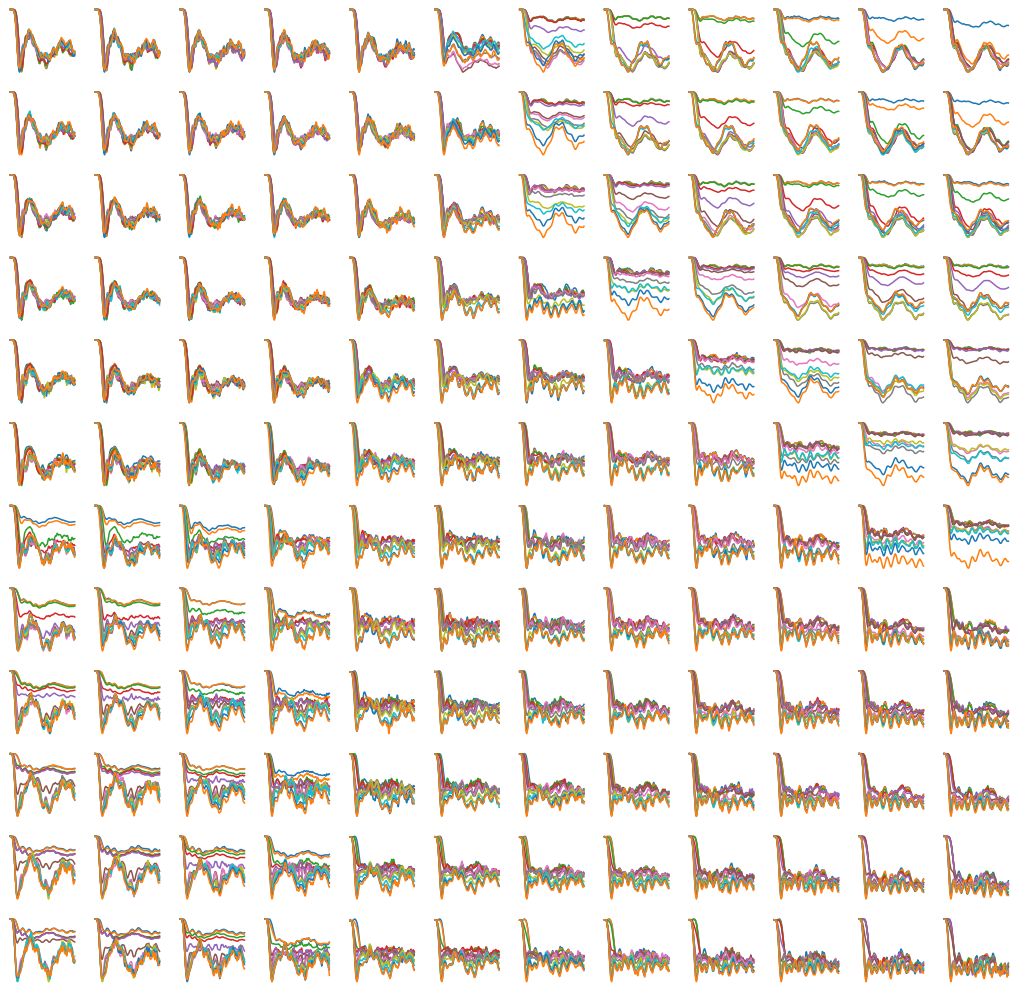

In [ ]:
fig, axes = plt.subplots(map_wth,map_dpt,figsize=(18,18))
#fig.set_size_inches(10)
for i in range(map_wth):
  for j in range(map_hgt):
    ax = axes[i][j]
    for k in range(map_dpt):
      ax.set_axis_off()
      sub = ax.plot(rweights[i][j][k])
plt.show()

##### Now, unified matrix

In [ ]:
## usando pra transplantar acima
rweights = weights.reshape(map_wth,map_hgt,map_dpt,800)
um = np.zeros((rweights.shape[0], rweights.shape[1],rweights.shape[2]))
it = np.nditer(um, flags=['multi_index'])
# mais uma cell
while not it.finished:
    for ii in range(it.multi_index[0]-1, it.multi_index[0]+2):
        for jj in range(it.multi_index[1]-1, it.multi_index[1]+2):
            if (ii >= 0 and ii < rweights.shape[0] and
                    jj >= 0 and jj < rweights.shape[1]):
                w_1 = rweights[ii, jj, :]
                w_2 = rweights[it.multi_index]
                um[it.multi_index] += np.linalg.norm(w_1-w_2)
    it.iternext()

# anoutra
um = um/um.max()

Não tem tu vai tu mêmo... então vou plotar de forma estendia... depois eu vejo como projetar em 3D né bonitinho e tal

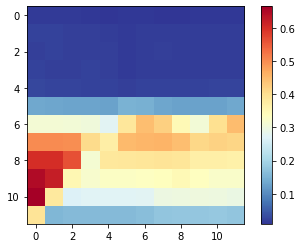

In [ ]:
plt.imshow(um[:][:][0], cmap=plt.cm.get_cmap('RdYlBu_r'), alpha=1)
plt.colorbar()

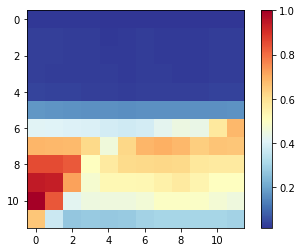

In [ ]:
plt.imshow(um[:][:][1], cmap=plt.cm.get_cmap('RdYlBu_r'), alpha=1)
plt.colorbar()

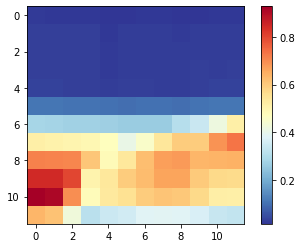

In [ ]:
plt.imshow(um[:][:][2], cmap=plt.cm.get_cmap('RdYlBu_r'), alpha=1)
plt.colorbar()

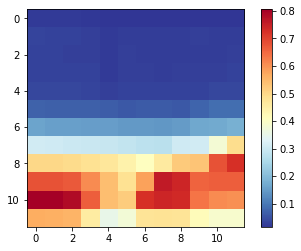

In [ ]:
plt.imshow(um[:][:][3], cmap=plt.cm.get_cmap('RdYlBu_r'), alpha=1)
plt.colorbar()

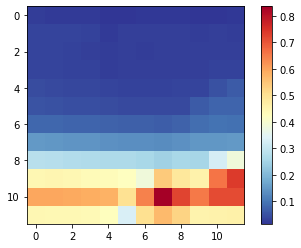

In [ ]:
plt.imshow(um[:][:][4], cmap=plt.cm.get_cmap('RdYlBu_r'), alpha=1)
plt.colorbar()

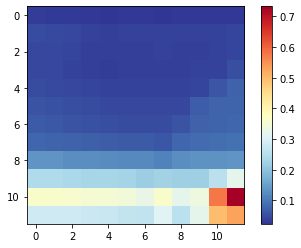

In [ ]:
plt.imshow(um[:][:][5], cmap=plt.cm.get_cmap('RdYlBu_r'), alpha=1)
plt.colorbar()

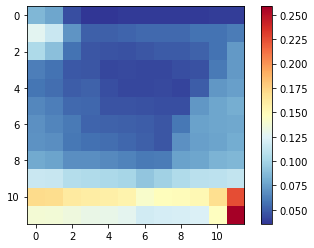

In [ ]:
plt.imshow(um[:][:][6], cmap=plt.cm.get_cmap('RdYlBu_r'), alpha=1)
plt.colorbar()

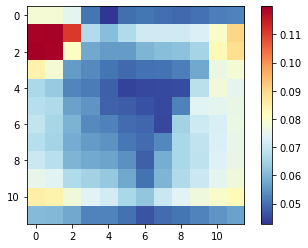

In [ ]:
plt.imshow(um[:][:][7], cmap=plt.cm.get_cmap('RdYlBu_r'), alpha=1)
plt.colorbar()

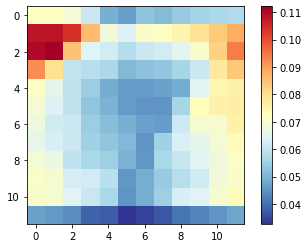

In [ ]:
plt.imshow(um[:][:][8], cmap=plt.cm.get_cmap('RdYlBu_r'), alpha=1)
plt.colorbar()

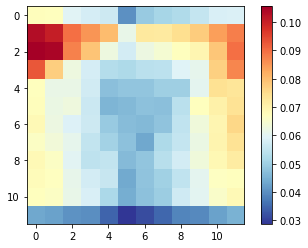

In [ ]:
plt.imshow(um[:][:][9], cmap=plt.cm.get_cmap('RdYlBu_r'), alpha=1)
plt.colorbar()

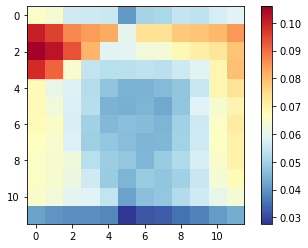

In [ ]:
plt.imshow(um[:][:][10], cmap=plt.cm.get_cmap('RdYlBu_r'), alpha=1)
plt.colorbar()

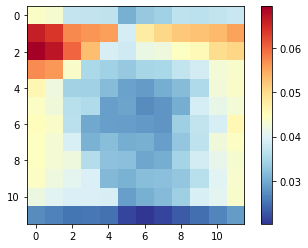

In [ ]:
plt.imshow(um[:][:][11], cmap=plt.cm.get_cmap('RdYlBu_r'), alpha=1)
plt.colorbar()

In [ ]:
def winner(x):
    """Computes the coordinates of the winning neuron for the sample x."""
    s = np.subtract(x, rweights)  # x - w
    am = np.linalg.norm(s, axis=-1)
    return np.unravel_index(am.argmin(), am.shape)

In [ ]:
npdf8.shape

(960, 800)

In [ ]:
from collections import defaultdict

In [ ]:
"""Returns a dictionary wm where wm[(i,j)] is a list
with all the patterns that have been mapped in the position i,j."""
# _check_input_len(data)
winmap = defaultdict(list)
for x in npdf8:
    winmap[winner(x)].append(x)


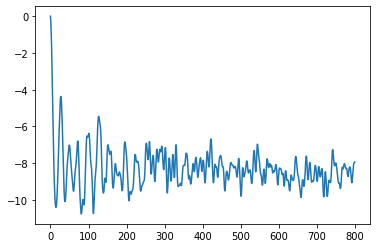

In [ ]:
plt.plot(winmap[(10,9,9)][0])

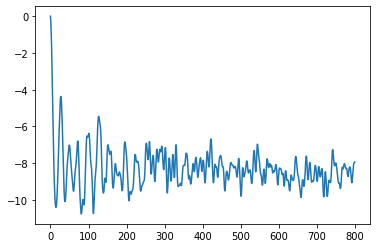

In [ ]:
plt.plot(winmap[(10,9,9)][0]) # já que a matriz de vencedores é esparsa, por assim dizer,
# é quase como jogar um joguinho de batalha naval...

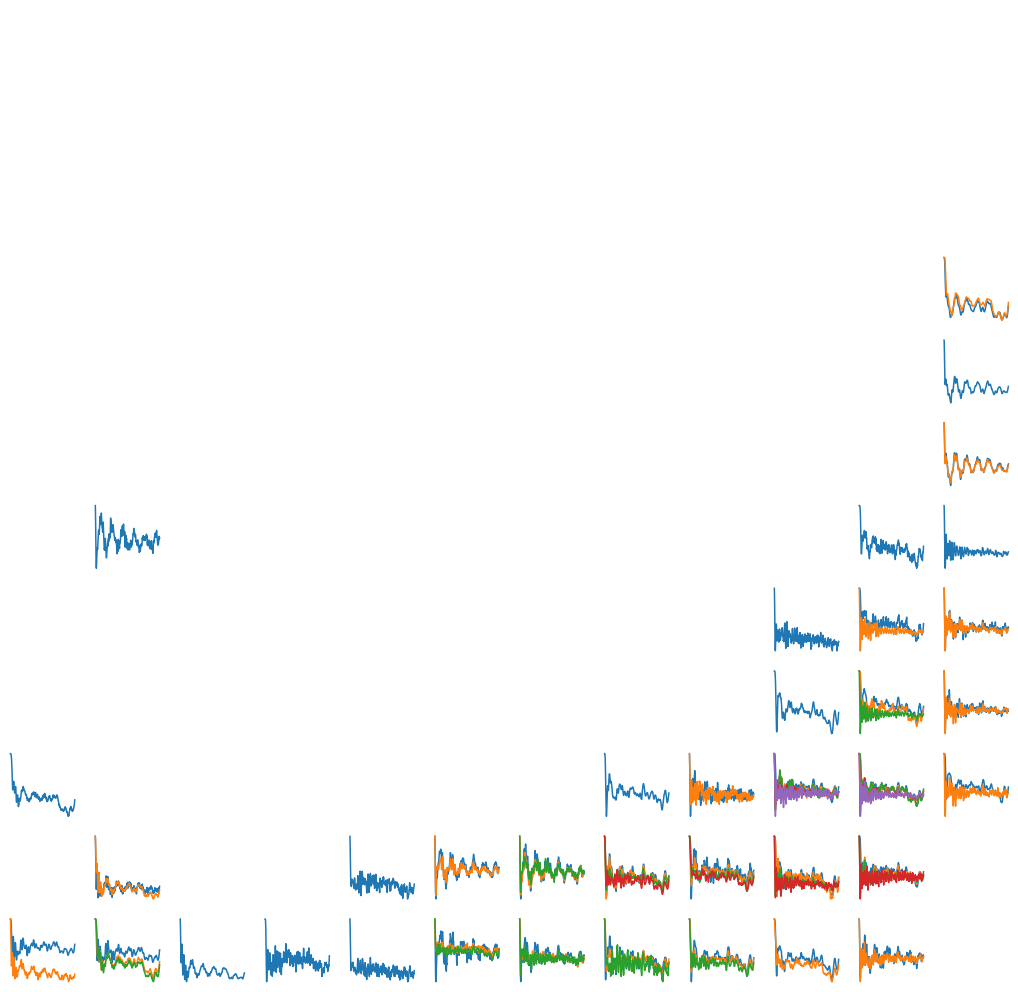

In [ ]:
# display neurons weights as time series
fig, axes = plt.subplots(map_wth,map_hgt,figsize=(18,18))
contagem = np.zeros((map_wth,map_hgt,map_dpt))
for i in range(map_wth):
  for j in range(map_hgt):
    ax = axes[i][j]
    for k in range(map_dpt):
      ax.set_axis_off()
      itemizado = winmap[(i,j,k)]
      # fazer a contagem
      contagem[i,j] = len(winmap[(i,j,k)]) 
      # print("Temos "+str(len(itemizado))+" series que sao vencidas no \\
      #     neuronio i =" +str(i)+" j = "+str(j)+" k= "+str(k))
      # print("Tentando fazer media")
      #print("itemizado"+str(np.asarray(itemizado).shape))
      if len(itemizado) > 0:
        serie_media = np.average(np.asarray(itemizado),0)
        # print(serie_media)
        ax.plot(range(800),serie_media)
plt.show()

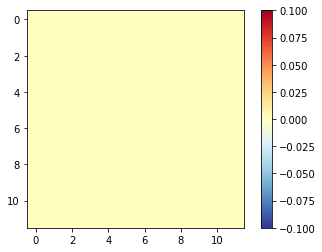

In [ ]:
plt.imshow(contagem[:][:][0], cmap=plt.cm.get_cmap('RdYlBu_r'), alpha=1)
plt.colorbar()

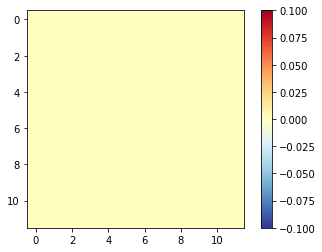

In [ ]:
plt.imshow(contagem[:][:][1], cmap=plt.cm.get_cmap('RdYlBu_r'), alpha=1)
plt.colorbar()

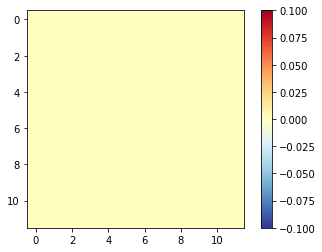

In [ ]:
plt.imshow(contagem[:][:][2], cmap=plt.cm.get_cmap('RdYlBu_r'), alpha=1)
plt.colorbar()

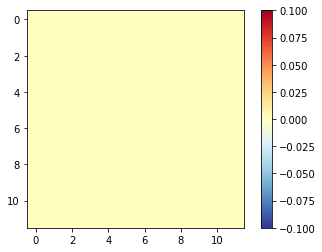

In [ ]:
plt.imshow(contagem[:][:][3], cmap=plt.cm.get_cmap('RdYlBu_r'), alpha=1)
plt.colorbar()

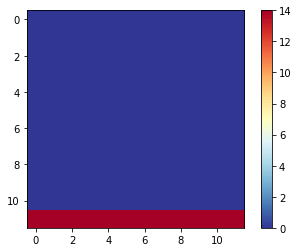

In [ ]:
plt.imshow(contagem[:][:][4], cmap=plt.cm.get_cmap('RdYlBu_r'), alpha=1)
plt.colorbar()

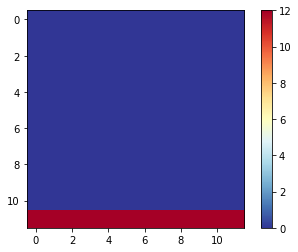

In [ ]:
plt.imshow(contagem[:][:][5], cmap=plt.cm.get_cmap('RdYlBu_r'), alpha=1)
plt.colorbar()

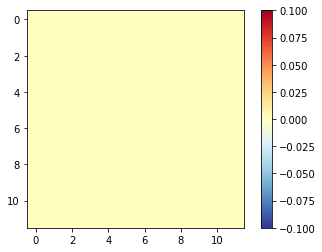

In [ ]:
plt.imshow(contagem[:][:][6], cmap=plt.cm.get_cmap('RdYlBu_r'), alpha=1)
plt.colorbar()

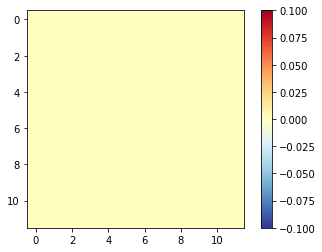

In [ ]:
plt.imshow(contagem[:][:][7], cmap=plt.cm.get_cmap('RdYlBu_r'), alpha=1)
plt.colorbar()

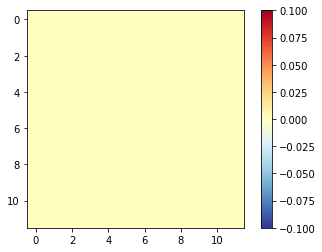

In [ ]:
plt.imshow(contagem[:][:][8], cmap=plt.cm.get_cmap('RdYlBu_r'), alpha=1)
plt.colorbar()

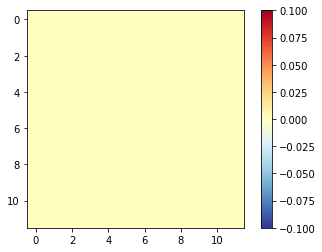

In [ ]:
plt.imshow(contagem[:][:][9], cmap=plt.cm.get_cmap('RdYlBu_r'), alpha=1)
plt.colorbar()

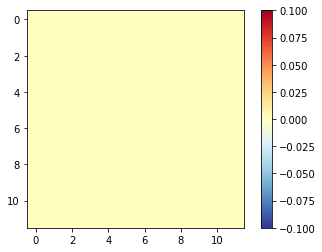

In [ ]:
plt.imshow(contagem[:][:][10], cmap=plt.cm.get_cmap('RdYlBu_r'), alpha=1)
plt.colorbar()

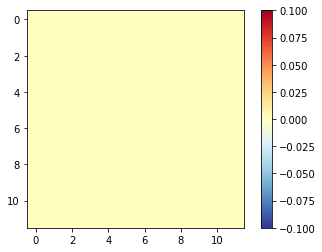

In [ ]:
plt.imshow(contagem[:][:][11], cmap=plt.cm.get_cmap('RdYlBu_r'), alpha=1)
plt.colorbar()

## From df9 = escala de massa 10^8 escala temporal 10^4

##### Mapa 8 por 8 por 8 = 512 classes

In [ ]:
# -*- coding: utf-8 -*-

# ####################################################################################################
# GPU-based Self-Organizing-Map by Lyes Khacef.
# Reference: L. Khacef, V. Gripon, and B. Miramond, “GPU-based self-organizing-maps 
# for post-labeled few-shot unsupervised learning”, in International Conference On 
# Neural Information Processing (ICONIP), 2020.
# ####################################################################################################

# hyper-parameters
train_data = 60000
label_data = 600
test_data = 10000
input_dim = 800 #784
map_wth = 12 # 10
map_hgt = 12 # 10
map_dpt = 12
class_nbr = 10
nbr_epochs = 60 # 20
eps_i_list = [1.0]
eps_f_list = [0.01]
eta_i_list = [10.0]
eta_f_list = [0.01]
sigma_kernel = 1.0

# GPU name
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    raise SystemError("GPU device not found!")
print('Found GPU at: {}'.format(device_name))

##
## So, what if theres not test data
##
# load dataset
# x_train, index_train, x_label, index_label, x_test, index_test, label_data = get_dataset(train_data, label_data, test_data)
index_train, x_label, index_label, x_test, index_test, label_data = False, False, False, False, False, False
x_train = npdf9

##
## how the hell
##
# false run_som(false, false, false, eta_f):
def run_som(eps_i, eps_f, eta_i, eta_f):
    print("\nHyper-parameters:   # eps_i = %f   # eps_f = %f   # eta_i = %f   # eta_f = %f" % (eps_i, eps_f, eta_i, eta_f))
    # train the network
    som = KSOM_3D(map_wth, map_hgt, map_dpt, input_dim)
    start_time = timeit.default_timer()
    som.train(nbr_epochs, eps_i, eps_f, eta_i, eta_f, x_train, x_label, index_label, x_test, index_test)
    end_time = timeit.default_timer()
    print("\nSOM training time = ", end_time - start_time)
    weights = som.get_weights().numpy()

    # save the weights
    #np.save("weights/som_weights.npy", weights)
    
    ##
    ## Now you no label
    ##
    # label the network
    #neuron_label = labeling(label_data, class_nbr, weights, x_label, index_label, sigma_kernel)
    neuron_label = False

    ##
    ## Now you no accuracy
    # test the network
    #accuracy = test(class_nbr, weights, x_test, index_test, neuron_label, sigma_kernel)
    accuracy = False

    return weights, accuracy

# hyper-parameters grid search
hyper_param_list, accuracy_list = [], []
for eps_i in eps_i_list:
    for eps_f in eps_f_list:
        for eta_i in eta_i_list:
            for eta_f in eta_f_list:
                hyper_param_list.append([eps_i, eps_f, eta_i, eta_f])
                weights, accuracy = run_som(eps_i, eps_f, eta_i, eta_f)
                accuracy_list.append(accuracy)


Found GPU at: /device:GPU:0

Hyper-parameters:   # eps_i = 1.000000   # eps_f = 0.010000   # eta_i = 10.000000   # eta_f = 0.010000
---------- Epoch 1 ----------
---------- Epoch 2 ----------
---------- Epoch 3 ----------
---------- Epoch 4 ----------
---------- Epoch 5 ----------
---------- Epoch 6 ----------
---------- Epoch 7 ----------
---------- Epoch 8 ----------
---------- Epoch 9 ----------
---------- Epoch 10 ----------
---------- Epoch 11 ----------
---------- Epoch 12 ----------
---------- Epoch 13 ----------
---------- Epoch 14 ----------
---------- Epoch 15 ----------
---------- Epoch 16 ----------
---------- Epoch 17 ----------
---------- Epoch 18 ----------
---------- Epoch 19 ----------
---------- Epoch 20 ----------
---------- Epoch 21 ----------
---------- Epoch 22 ----------
---------- Epoch 23 ----------
---------- Epoch 24 ----------
---------- Epoch 25 ----------
---------- Epoch 26 ----------
---------- Epoch 27 ----------
---------- Epoch 28 ----------
---------

In [ ]:
rweights = weights.reshape(map_wth,map_hgt,map_dpt,800)


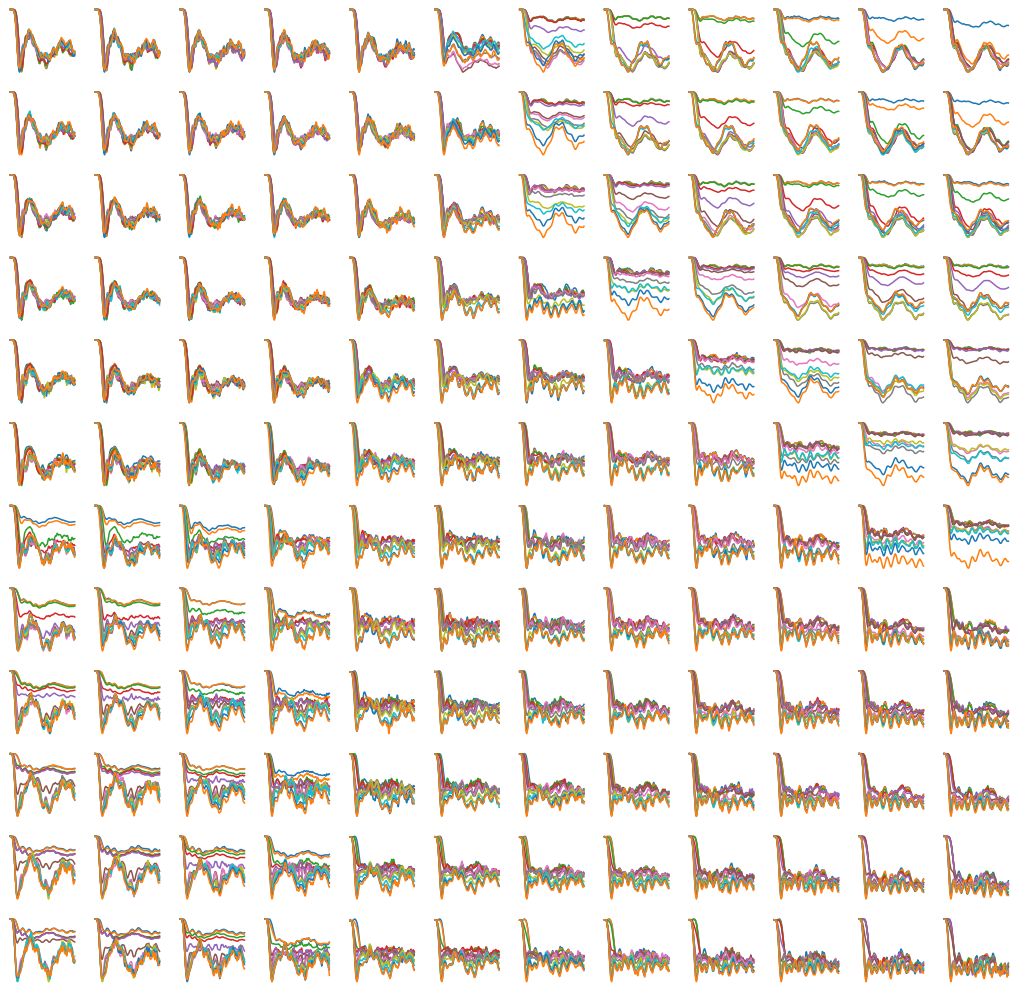

In [ ]:
fig, axes = plt.subplots(map_wth,map_dpt,figsize=(18,18))
# fig.set_size_inches(10)
for i in range(map_wth):
  for j in range(map_hgt):
    ax = axes[i][j]
    for k in range(map_dpt):
      ax.set_axis_off()
      sub = ax.plot(rweights[i][j][k])
plt.show()

##### Now, unified matrix

In [ ]:
## usando pra transplantar acima
rweights = weights.reshape(map_wth,map_hgt,map_dpt,800)
um = np.zeros((rweights.shape[0], rweights.shape[1], rweights.shape[2])) # 8 e 800 p/ som 2x2x2
it = np.nditer(um, flags=['multi_index'])

# mais uma cell
while not it.finished:
    for ii in range(it.multi_index[0]-1, it.multi_index[0]+2):
        for jj in range(it.multi_index[1]-1, it.multi_index[1]+2):
            if (ii >= 0 and ii < rweights.shape[0] and
                    jj >= 0 and jj < rweights.shape[1]):
                w_1 = rweights[ii, jj, :]
                w_2 = rweights[it.multi_index]
                um[it.multi_index] += np.linalg.norm(w_1-w_2)
    it.iternext()

# anoutra
um = um/um.max()

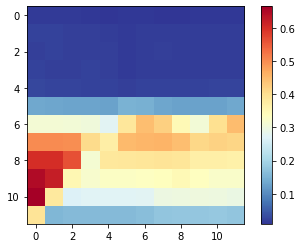

In [ ]:
plt.imshow(um[:][:][0], cmap=plt.cm.get_cmap('RdYlBu_r'), alpha=1)
plt.colorbar()

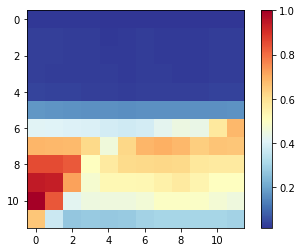

In [ ]:
plt.imshow(um[:][:][1], cmap=plt.cm.get_cmap('RdYlBu_r'), alpha=1)
plt.colorbar()

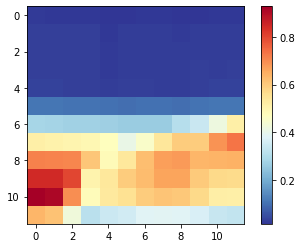

In [ ]:
plt.imshow(um[:][:][2], cmap=plt.cm.get_cmap('RdYlBu_r'), alpha=1)
plt.colorbar()

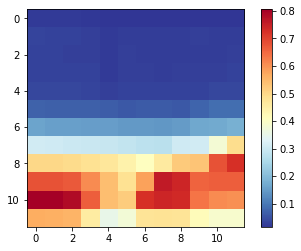

In [ ]:
plt.imshow(um[:][:][3], cmap=plt.cm.get_cmap('RdYlBu_r'), alpha=1)
plt.colorbar()

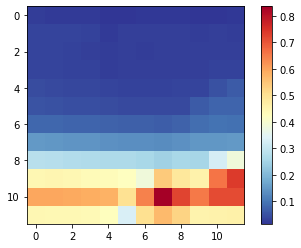

In [ ]:
plt.imshow(um[:][:][4], cmap=plt.cm.get_cmap('RdYlBu_r'), alpha=1)
plt.colorbar()

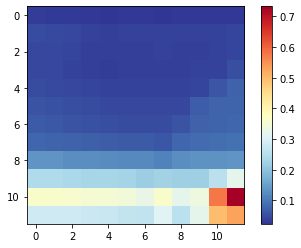

In [ ]:
plt.imshow(um[:][:][5], cmap=plt.cm.get_cmap('RdYlBu_r'), alpha=1)
plt.colorbar()

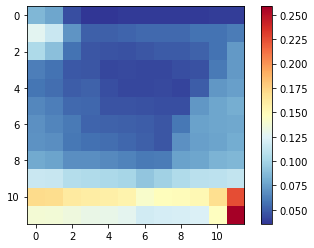

In [ ]:
plt.imshow(um[:][:][6], cmap=plt.cm.get_cmap('RdYlBu_r'), alpha=1)
plt.colorbar()

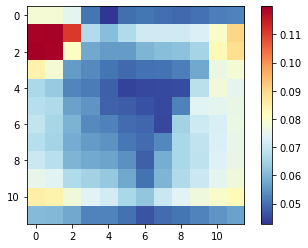

In [ ]:
plt.imshow(um[:][:][7], cmap=plt.cm.get_cmap('RdYlBu_r'), alpha=1)
plt.colorbar()

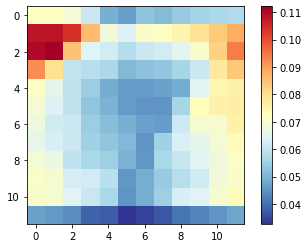

In [ ]:
plt.imshow(um[:][:][8], cmap=plt.cm.get_cmap('RdYlBu_r'), alpha=1)
plt.colorbar()

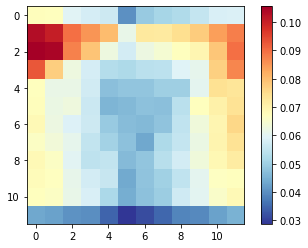

In [ ]:
plt.imshow(um[:][:][9], cmap=plt.cm.get_cmap('RdYlBu_r'), alpha=1)
plt.colorbar()

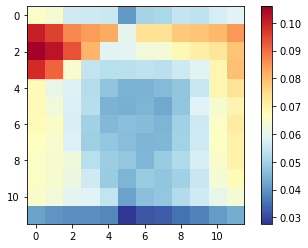

In [ ]:
plt.imshow(um[:][:][10], cmap=plt.cm.get_cmap('RdYlBu_r'), alpha=1)
plt.colorbar()

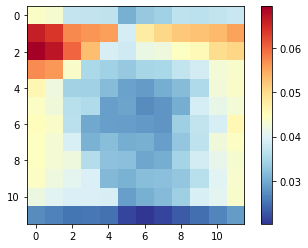

In [ ]:
plt.imshow(um[:][:][11], cmap=plt.cm.get_cmap('RdYlBu_r'), alpha=1)
plt.colorbar()

In [ ]:
def winner(x):
    """Computes the coordinates of the winning neuron for the sample x."""
    s = np.subtract(x, rweights)  # x - w
    am = np.linalg.norm(s, axis=-1)
    return np.unravel_index(am.argmin(), am.shape)

In [ ]:
npdf9.shape

(960, 800)

In [ ]:
from collections import defaultdict

In [ ]:
"""Returns a dictionary wm where wm[(i,j)] is a list
with all the patterns that have been mapped in the position i,j."""
# _check_input_len(data)
winmap = defaultdict(list)
for x in npdf9:
    winmap[winner(x)].append(x)


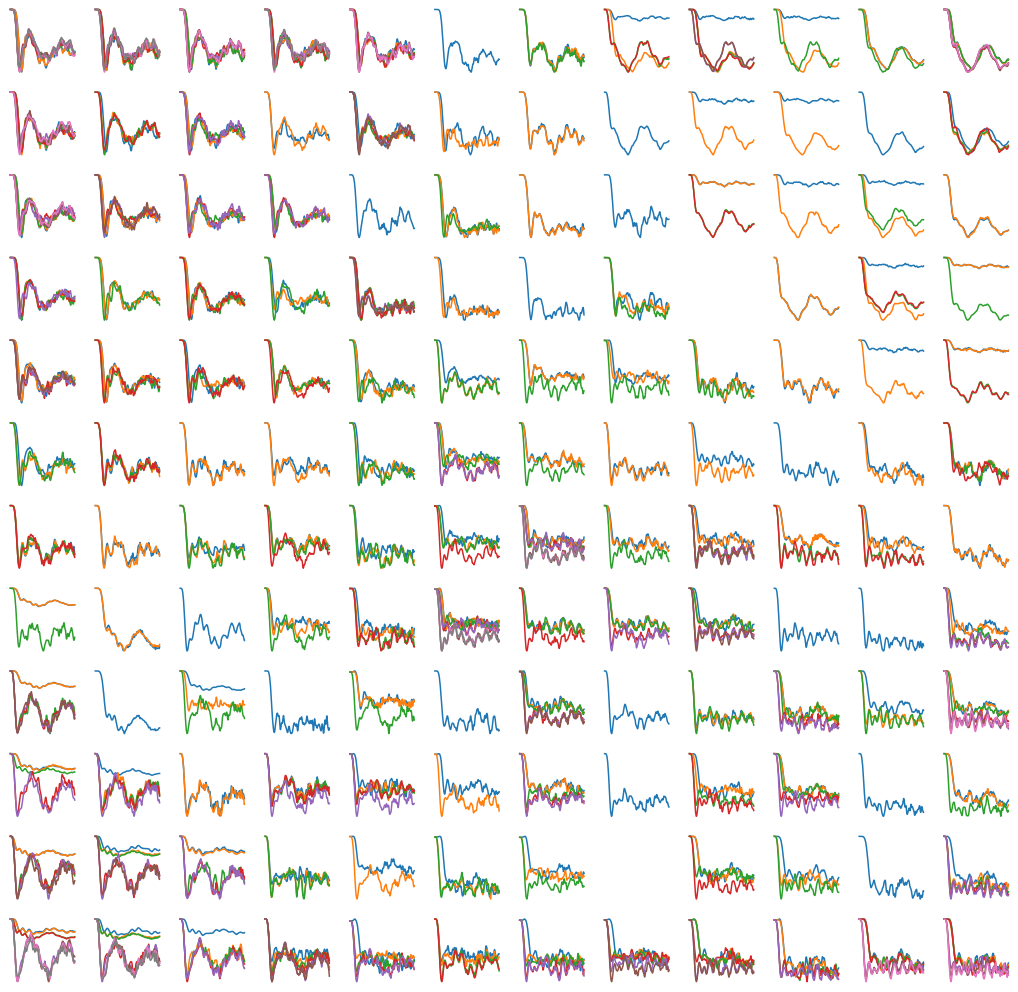

In [ ]:
# display neurons weights as time series
fig, axes = plt.subplots(map_wth,map_hgt,figsize=(18,18))
contagem = np.zeros((map_wth,map_hgt,map_dpt))
for i in range(map_wth):
  for j in range(map_hgt):
    ax = axes[i][j]
    for k in range(map_dpt):
      ax.set_axis_off()
      itemizado = winmap[(i,j,k)]
      # fazer a contagem
      contagem[i,j] = len(winmap[(i,j,k)])
      # print("Temos "+str(len(itemizado))+" series que sao vencidas no \\
      #     neuronio i =" +str(i)+" j = "+str(j))
      # print("Tentando fazer media")
      #print("itemizado"+str(np.asarray(itemizado).shape))
      if len(itemizado) > 0:
        serie_media = np.average(np.asarray(itemizado),0)
        # print(serie_media)
        ax.plot(range(800),serie_media)
plt.show()

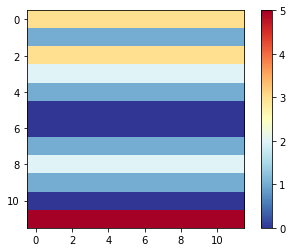

In [ ]:
plt.imshow(contagem[:][:][0], cmap=plt.cm.get_cmap('RdYlBu_r'), alpha=1)
plt.colorbar()

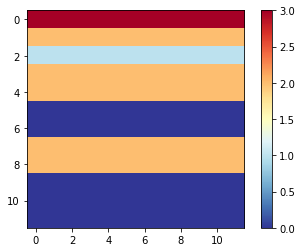

In [ ]:
plt.imshow(contagem[:][:][1], cmap=plt.cm.get_cmap('RdYlBu_r'), alpha=1)
plt.colorbar()

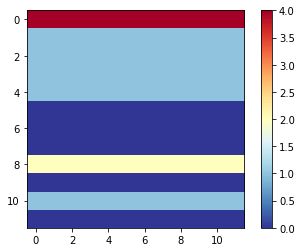

In [ ]:
plt.imshow(contagem[:][:][2], cmap=plt.cm.get_cmap('RdYlBu_r'), alpha=1)
plt.colorbar()

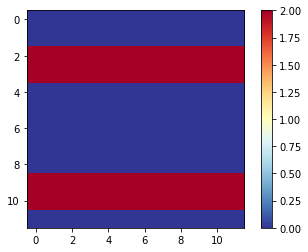

In [ ]:
plt.imshow(contagem[:][:][3], cmap=plt.cm.get_cmap('RdYlBu_r'), alpha=1)
plt.colorbar()

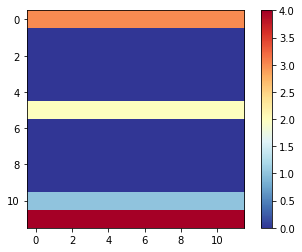

In [ ]:
plt.imshow(contagem[:][:][4], cmap=plt.cm.get_cmap('RdYlBu_r'), alpha=1)
plt.colorbar()

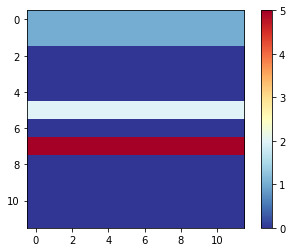

In [ ]:
plt.imshow(contagem[:][:][5], cmap=plt.cm.get_cmap('RdYlBu_r'), alpha=1)
plt.colorbar()

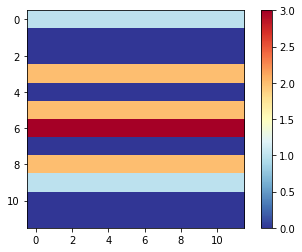

In [ ]:
plt.imshow(contagem[:][:][6], cmap=plt.cm.get_cmap('RdYlBu_r'), alpha=1)
plt.colorbar()

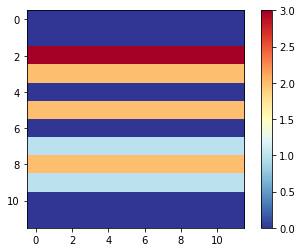

In [ ]:
plt.imshow(contagem[:][:][7], cmap=plt.cm.get_cmap('RdYlBu_r'), alpha=1)
plt.colorbar()

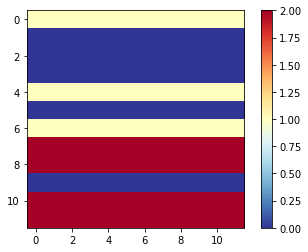

In [ ]:
plt.imshow(contagem[:][:][8], cmap=plt.cm.get_cmap('RdYlBu_r'), alpha=1)
plt.colorbar()

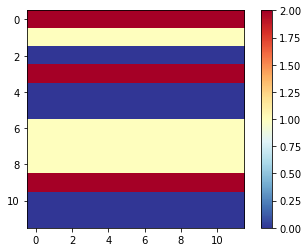

In [ ]:
plt.imshow(contagem[:][:][9], cmap=plt.cm.get_cmap('RdYlBu_r'), alpha=1)
plt.colorbar()

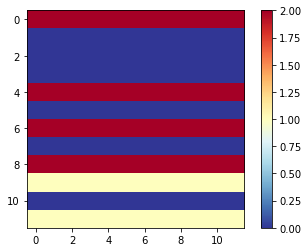

In [ ]:
plt.imshow(contagem[:][:][10], cmap=plt.cm.get_cmap('RdYlBu_r'), alpha=1)
plt.colorbar()

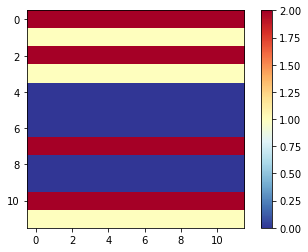

In [ ]:
plt.imshow(contagem[:][:][11], cmap=plt.cm.get_cmap('RdYlBu_r'), alpha=1)
plt.colorbar()

## Before stuff

##### Mapa 10 por 10 = 100 classes

In [ ]:
# -*- coding: utf-8 -*-

# ####################################################################################################
# GPU-based Self-Organizing-Map by Lyes Khacef.
# Reference: L. Khacef, V. Gripon, and B. Miramond, “GPU-based self-organizing-maps 
# for post-labeled few-shot unsupervised learning”, in International Conference On 
# Neural Information Processing (ICONIP), 2020.
# ####################################################################################################

# imports
#from imports import *
#from gpu_check import *
#from data_load import *
#from tf_ksom import *
#from label import *
#from test import *

# hyper-parameters
train_data = 60000
label_data = 600
test_data = 10000
input_dim = 800 #784
map_wth = 10
map_hgt = 10
class_nbr = 10
nbr_epochs = 40 # 20
eps_i_list = [1.0]
eps_f_list = [0.01]
eta_i_list = [10.0]
eta_f_list = [0.01]
sigma_kernel = 1.0

# GPU name
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    raise SystemError("GPU device not found!")
print('Found GPU at: {}'.format(device_name))

##
## So, what if theres not test data
##
# load dataset
# x_train, index_train, x_label, index_label, x_test, index_test, label_data = get_dataset(train_data, label_data, test_data)
index_train, x_label, index_label, x_test, index_test, label_data = False, False, False, False, False, False
x_train = npdf1

##
## how the hell
##
# false run_som(false, false, false, eta_f):
def run_som(eps_i, eps_f, eta_i, eta_f):
    print("\nHyper-parameters:   # eps_i = %f   # eps_f = %f   # eta_i = %f   # eta_f = %f" % (eps_i, eps_f, eta_i, eta_f))
    # train the network
    som = KSOM(map_wth, map_hgt, input_dim)
    start_time = timeit.default_timer()
    som.train(nbr_epochs, eps_i, eps_f, eta_i, eta_f, x_train, x_label, index_label, x_test, index_test)
    end_time = timeit.default_timer()
    print("\nSOM training time = ", end_time - start_time)
    weights = som.get_weights().numpy()

    # save the weights
    #np.save("weights/som_weights.npy", weights)
    
    ##
    ## Now you no label
    ##
    # label the network
    #neuron_label = labeling(label_data, class_nbr, weights, x_label, index_label, sigma_kernel)
    neuron_label = False

    ##
    ## Now you no accuracy
    # test the network
    #accuracy = test(class_nbr, weights, x_test, index_test, neuron_label, sigma_kernel)
    accuracy = False

    return weights, accuracy

# hyper-parameters grid search
hyper_param_list, accuracy_list = [], []
for eps_i in eps_i_list:
    for eps_f in eps_f_list:
        for eta_i in eta_i_list:
            for eta_f in eta_f_list:
                hyper_param_list.append([eps_i, eps_f, eta_i, eta_f])
                weights, accuracy = run_som(eps_i, eps_f, eta_i, eta_f)
                accuracy_list.append(accuracy)


Found GPU at: /device:GPU:0


NameError: ignored

In [ ]:
## hyper parameters below 
## label list below

# GPU memory check
gpu_report()

# display neurons weights as mnist digits
som_grid = plt.figure(figsize=(20, 20)) # width, height in inches
for n in range(map_wth*map_hgt):
    ##
    ## Must make this into time series plot. Shouldnt be the thing
    ##
    #image = weights[n].reshape([28,28]) # x_train[num] is the 784 normalized pixel values
    sub = som_grid.add_subplot(map_wth, map_hgt, n + 1)
    sub.set_axis_off()
    clr = sub.plot(weights[n]) # imshow(image, cmap = plt.get_cmap("jet"), interpolation = "nearest")
    #plt.colorbar(clr)
#plt.savefig("plots/som_weights.png")
plt.show()

##### Mapa 5 por 5 = 25 classes

In [ ]:
# -*- coding: utf-8 -*-

# ####################################################################################################
# GPU-based Self-Organizing-Map by Lyes Khacef.
# Reference: L. Khacef, V. Gripon, and B. Miramond, “GPU-based self-organizing-maps 
# for post-labeled few-shot unsupervised learning”, in International Conference On 
# Neural Information Processing (ICONIP), 2020.
# ####################################################################################################

# imports
#from imports import *
#from gpu_check import *
#from data_load import *
#from tf_ksom import *
#from label import *
#from test import *

# hyper-parameters
train_data = 60000
label_data = 600
test_data = 10000
input_dim = 800 #784
map_wth = 5
map_hgt = 5
class_nbr = 10
nbr_epochs = 40 # 20
eps_i_list = [1.0]
eps_f_list = [0.01]
eta_i_list = [10.0]
eta_f_list = [0.01]
sigma_kernel = 1.0

# GPU name
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    raise SystemError("GPU device not found!")
print('Found GPU at: {}'.format(device_name))

##
## So, what if theres not test data
##
# load dataset
# x_train, index_train, x_label, index_label, x_test, index_test, label_data = get_dataset(train_data, label_data, test_data)
index_train, x_label, index_label, x_test, index_test, label_data = False, False, False, False, False, False
x_train = npdf1

##
## how the hell
##
# false run_som(false, false, false, eta_f):
def run_som(eps_i, eps_f, eta_i, eta_f):
    print("\nHyper-parameters:   # eps_i = %f   # eps_f = %f   # eta_i = %f   # eta_f = %f" % (eps_i, eps_f, eta_i, eta_f))
    # train the network
    som = KSOM(map_wth, map_hgt, input_dim)
    start_time = timeit.default_timer()
    som.train(nbr_epochs, eps_i, eps_f, eta_i, eta_f, x_train, x_label, index_label, x_test, index_test)
    end_time = timeit.default_timer()
    print("\nSOM training time = ", end_time - start_time)
    weights = som.get_weights().numpy()

    # save the weights
    #np.save("weights/som_weights.npy", weights)
    
    ##
    ## Now you no label
    ##
    # label the network
    #neuron_label = labeling(label_data, class_nbr, weights, x_label, index_label, sigma_kernel)
    neuron_label = False

    ##
    ## Now you no accuracy
    # test the network
    #accuracy = test(class_nbr, weights, x_test, index_test, neuron_label, sigma_kernel)
    accuracy = False

    return weights, accuracy

# hyper-parameters grid search
hyper_param_list, accuracy_list = [], []
for eps_i in eps_i_list:
    for eps_f in eps_f_list:
        for eta_i in eta_i_list:
            for eta_f in eta_f_list:
                hyper_param_list.append([eps_i, eps_f, eta_i, eta_f])
                weights, accuracy = run_som(eps_i, eps_f, eta_i, eta_f)
                accuracy_list.append(accuracy)


Found GPU at: /device:GPU:0

Hyper-parameters:   # eps_i = 1.000000   # eps_f = 0.010000   # eta_i = 10.000000   # eta_f = 0.010000
---------- Epoch 1 ----------
---------- Epoch 2 ----------
---------- Epoch 3 ----------
---------- Epoch 4 ----------
---------- Epoch 5 ----------
---------- Epoch 6 ----------
---------- Epoch 7 ----------
---------- Epoch 8 ----------
---------- Epoch 9 ----------
---------- Epoch 10 ----------
---------- Epoch 11 ----------
---------- Epoch 12 ----------
---------- Epoch 13 ----------
---------- Epoch 14 ----------
---------- Epoch 15 ----------
---------- Epoch 16 ----------
---------- Epoch 17 ----------
---------- Epoch 18 ----------
---------- Epoch 19 ----------
---------- Epoch 20 ----------
---------- Epoch 21 ----------
---------- Epoch 22 ----------
---------- Epoch 23 ----------
---------- Epoch 24 ----------
---------- Epoch 25 ----------
---------- Epoch 26 ----------
---------- Epoch 27 ----------
---------- Epoch 28 ----------
---------

CPU RAM Free: 11.2 GB
GPU 0 ... Mem Free: 11166MB / 11441MB | Utilization   2%


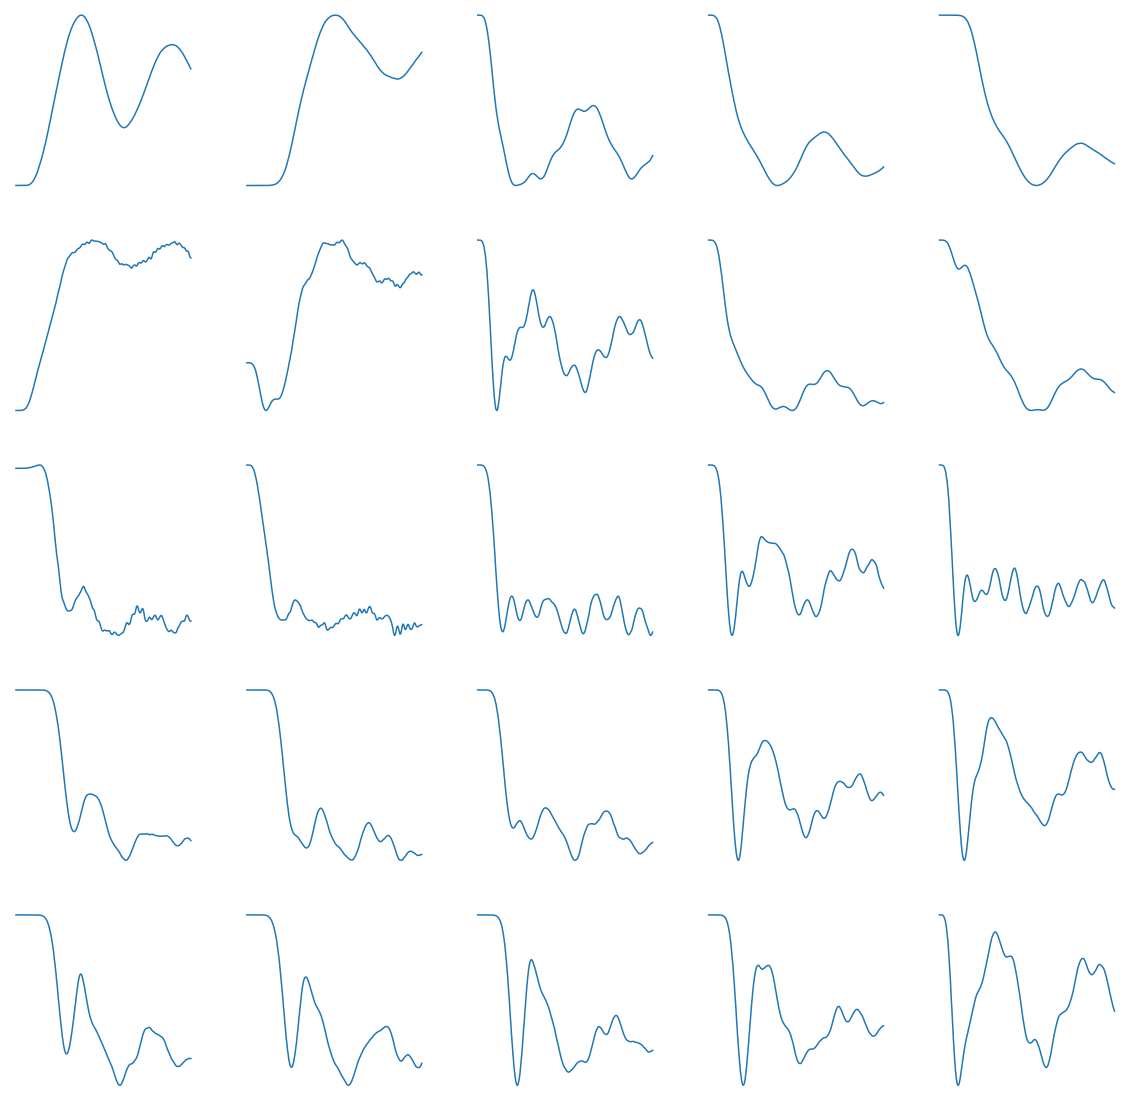

In [ ]:
## hyper parameters below 
## label list below

# GPU memory check
gpu_report()

# display neurons weights as mnist digits
som_grid = plt.figure(figsize=(20, 20)) # width, height in inches
for n in range(map_wth*map_hgt):
    ##
    ## Must make this into time series plot. Shouldnt be the thing
    ##
    #image = weights[n].reshape([28,28]) # x_train[num] is the 784 normalized pixel values
    sub = som_grid.add_subplot(map_wth, map_hgt, n + 1)
    sub.set_axis_off()
    clr = sub.plot(weights[n]) # imshow(image, cmap = plt.get_cmap("jet"), interpolation = "nearest")
    #plt.colorbar(clr)
#plt.savefig("plots/som_weights.png")
plt.show()

##### Mapa 4 por 4 = 16 classes

In [ ]:
# -*- coding: utf-8 -*-

# ####################################################################################################
# GPU-based Self-Organizing-Map by Lyes Khacef.
# Reference: L. Khacef, V. Gripon, and B. Miramond, “GPU-based self-organizing-maps 
# for post-labeled few-shot unsupervised learning”, in International Conference On 
# Neural Information Processing (ICONIP), 2020.
# ####################################################################################################

# imports
#from imports import *
#from gpu_check import *
#from data_load import *
#from tf_ksom import *
#from label import *
#from test import *

# hyper-parameters
train_data = 60000
label_data = 600
test_data = 10000
input_dim = 800 #784
map_wth = 4
map_hgt = 4
class_nbr = 10
nbr_epochs = 40 # 20
eps_i_list = [1.0]
eps_f_list = [0.01]
eta_i_list = [10.0]
eta_f_list = [0.01]
sigma_kernel = 1.0

# GPU name
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    raise SystemError("GPU device not found!")
print('Found GPU at: {}'.format(device_name))

##
## So, what if theres not test data
##
# load dataset
# x_train, index_train, x_label, index_label, x_test, index_test, label_data = get_dataset(train_data, label_data, test_data)
index_train, x_label, index_label, x_test, index_test, label_data = False, False, False, False, False, False
x_train = npdf1

##
## how the hell
##
# false run_som(false, false, false, eta_f):
def run_som(eps_i, eps_f, eta_i, eta_f):
    print("\nHyper-parameters:   # eps_i = %f   # eps_f = %f   # eta_i = %f   # eta_f = %f" % (eps_i, eps_f, eta_i, eta_f))
    # train the network
    som = KSOM(map_wth, map_hgt, input_dim)
    start_time = timeit.default_timer()
    som.train(nbr_epochs, eps_i, eps_f, eta_i, eta_f, x_train, x_label, index_label, x_test, index_test)
    end_time = timeit.default_timer()
    print("\nSOM training time = ", end_time - start_time)
    weights = som.get_weights().numpy()

    # save the weights
    #np.save("weights/som_weights.npy", weights)
    
    ##
    ## Now you no label
    ##
    # label the network
    #neuron_label = labeling(label_data, class_nbr, weights, x_label, index_label, sigma_kernel)
    neuron_label = False

    ##
    ## Now you no accuracy
    # test the network
    #accuracy = test(class_nbr, weights, x_test, index_test, neuron_label, sigma_kernel)
    accuracy = False

    return weights, accuracy

# hyper-parameters grid search
hyper_param_list, accuracy_list = [], []
for eps_i in eps_i_list:
    for eps_f in eps_f_list:
        for eta_i in eta_i_list:
            for eta_f in eta_f_list:
                hyper_param_list.append([eps_i, eps_f, eta_i, eta_f])
                weights, accuracy = run_som(eps_i, eps_f, eta_i, eta_f)
                accuracy_list.append(accuracy)


Found GPU at: /device:GPU:0

Hyper-parameters:   # eps_i = 1.000000   # eps_f = 0.010000   # eta_i = 10.000000   # eta_f = 0.010000
---------- Epoch 1 ----------
---------- Epoch 2 ----------
---------- Epoch 3 ----------
---------- Epoch 4 ----------
---------- Epoch 5 ----------
---------- Epoch 6 ----------
---------- Epoch 7 ----------
---------- Epoch 8 ----------
---------- Epoch 9 ----------
---------- Epoch 10 ----------
---------- Epoch 11 ----------
---------- Epoch 12 ----------
---------- Epoch 13 ----------
---------- Epoch 14 ----------
---------- Epoch 15 ----------
---------- Epoch 16 ----------
---------- Epoch 17 ----------
---------- Epoch 18 ----------
---------- Epoch 19 ----------
---------- Epoch 20 ----------
---------- Epoch 21 ----------
---------- Epoch 22 ----------
---------- Epoch 23 ----------
---------- Epoch 24 ----------
---------- Epoch 25 ----------
---------- Epoch 26 ----------
---------- Epoch 27 ----------
---------- Epoch 28 ----------
---------

CPU RAM Free: 11.4 GB
GPU 0 ... Mem Free: 11166MB / 11441MB | Utilization   2%


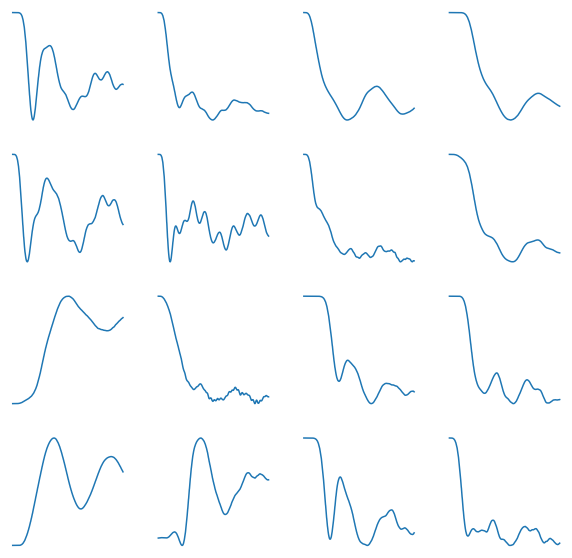

In [ ]:
## hyper parameters below 
## label list below

# GPU memory check
gpu_report()

# display neurons weights as mnist digits
som_grid = plt.figure(figsize=(10, 10)) # width, height in inches
for n in range(map_wth*map_hgt):
    ##
    ## Must make this into time series plot. Shouldnt be the thing
    ##
    #image = weights[n].reshape([28,28]) # x_train[num] is the 784 normalized pixel values
    sub = som_grid.add_subplot(map_wth, map_hgt, n + 1)
    sub.set_axis_off()
    clr = sub.plot(weights[n]) # imshow(image, cmap = plt.get_cmap("jet"), interpolation = "nearest")
    #plt.colorbar(clr)
#plt.savefig("plots/som_weights.png")
plt.show()

##### Mapa 3 por 3 = 9 classes

In [ ]:
# -*- coding: utf-8 -*-

# ####################################################################################################
# GPU-based Self-Organizing-Map by Lyes Khacef.
# Reference: L. Khacef, V. Gripon, and B. Miramond, “GPU-based self-organizing-maps 
# for post-labeled few-shot unsupervised learning”, in International Conference On 
# Neural Information Processing (ICONIP), 2020.
# ####################################################################################################

# imports
#from imports import *
#from gpu_check import *
#from data_load import *
#from tf_ksom import *
#from label import *
#from test import *

# hyper-parameters
train_data = 60000
label_data = 600
test_data = 10000
input_dim = 800 #784
map_wth = 3
map_hgt = 3
class_nbr = 10
nbr_epochs = 40 # 20
eps_i_list = [1.0]
eps_f_list = [0.01]
eta_i_list = [10.0]
eta_f_list = [0.01]
sigma_kernel = 1.0

# GPU name
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    raise SystemError("GPU device not found!")
print('Found GPU at: {}'.format(device_name))

##
## So, what if theres not test data
##
# load dataset
# x_train, index_train, x_label, index_label, x_test, index_test, label_data = get_dataset(train_data, label_data, test_data)
index_train, x_label, index_label, x_test, index_test, label_data = False, False, False, False, False, False
x_train = npdf1

##
## how the hell
##
# false run_som(false, false, false, eta_f):
def run_som(eps_i, eps_f, eta_i, eta_f):
    print("\nHyper-parameters:   # eps_i = %f   # eps_f = %f   # eta_i = %f   # eta_f = %f" % (eps_i, eps_f, eta_i, eta_f))
    # train the network
    som = KSOM(map_wth, map_hgt, input_dim)
    start_time = timeit.default_timer()
    som.train(nbr_epochs, eps_i, eps_f, eta_i, eta_f, x_train, x_label, index_label, x_test, index_test)
    end_time = timeit.default_timer()
    print("\nSOM training time = ", end_time - start_time)
    weights = som.get_weights().numpy()

    # save the weights
    #np.save("weights/som_weights.npy", weights)
    
    ##
    ## Now you no label
    ##
    # label the network
    #neuron_label = labeling(label_data, class_nbr, weights, x_label, index_label, sigma_kernel)
    neuron_label = False

    ##
    ## Now you no accuracy
    # test the network
    #accuracy = test(class_nbr, weights, x_test, index_test, neuron_label, sigma_kernel)
    accuracy = False

    return weights, accuracy

# hyper-parameters grid search
hyper_param_list, accuracy_list = [], []
for eps_i in eps_i_list:
    for eps_f in eps_f_list:
        for eta_i in eta_i_list:
            for eta_f in eta_f_list:
                hyper_param_list.append([eps_i, eps_f, eta_i, eta_f])
                weights, accuracy = run_som(eps_i, eps_f, eta_i, eta_f)
                accuracy_list.append(accuracy)


Found GPU at: /device:GPU:0

Hyper-parameters:   # eps_i = 1.000000   # eps_f = 0.010000   # eta_i = 10.000000   # eta_f = 0.010000
---------- Epoch 1 ----------
---------- Epoch 2 ----------
---------- Epoch 3 ----------
---------- Epoch 4 ----------
---------- Epoch 5 ----------
---------- Epoch 6 ----------
---------- Epoch 7 ----------
---------- Epoch 8 ----------
---------- Epoch 9 ----------
---------- Epoch 10 ----------
---------- Epoch 11 ----------
---------- Epoch 12 ----------
---------- Epoch 13 ----------
---------- Epoch 14 ----------
---------- Epoch 15 ----------
---------- Epoch 16 ----------
---------- Epoch 17 ----------
---------- Epoch 18 ----------
---------- Epoch 19 ----------
---------- Epoch 20 ----------
---------- Epoch 21 ----------
---------- Epoch 22 ----------
---------- Epoch 23 ----------
---------- Epoch 24 ----------
---------- Epoch 25 ----------
---------- Epoch 26 ----------
---------- Epoch 27 ----------
---------- Epoch 28 ----------
---------

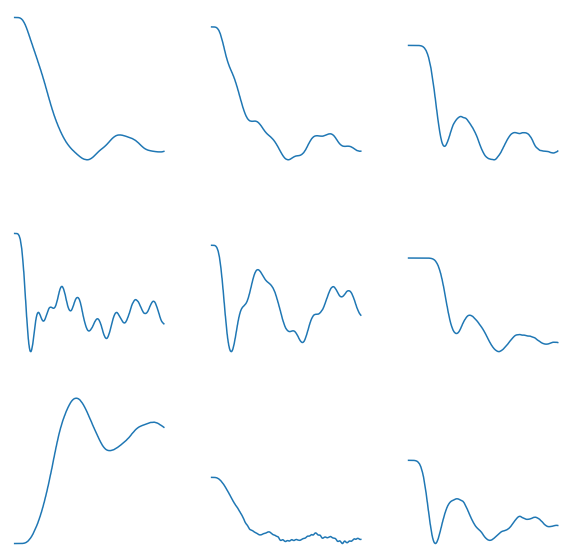

In [ ]:
# display neurons weights as time series
som_grid = plt.figure(figsize=(10, 10)) # width, height in inches
for i in range(map_wth*map_hgt):
  # for j in range(map_hgt):
  sub = som_grid.add_subplot(map_wth, map_hgt, i+1)
  # for k in range(map_dpt):
      #image = weights[n].reshape([28,28]) # x_train[num] is the 784 normalized pixel values
  sub.set_axis_off()
  clr = sub.plot(range(800),weights[i],i+1)
plt.show()

##### Mapa 3 por 3 por 3 = 27 classes

In [ ]:
# -*- coding: utf-8 -*-

# ####################################################################################################
# GPU-based Self-Organizing-Map by Lyes Khacef.
# Reference: L. Khacef, V. Gripon, and B. Miramond, “GPU-based self-organizing-maps 
# for post-labeled few-shot unsupervised learning”, in International Conference On 
# Neural Information Processing (ICONIP), 2020.
# ####################################################################################################

# imports
#from imports import *
#from gpu_check import *
#from data_load import *
#from tf_ksom import *
#from label import *
#from test import *

# hyper-parameters
train_data = 60000
label_data = 600
test_data = 10000
input_dim = 800 #784
map_wth = 3
map_hgt = 3
map_dpt = 3
class_nbr = 10
nbr_epochs = 40 # 20
eps_i_list = [1.0]
eps_f_list = [0.01]
eta_i_list = [10.0]
eta_f_list = [0.01]
sigma_kernel = 1.0

# GPU name
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    raise SystemError("GPU device not found!")
print('Found GPU at: {}'.format(device_name))

##
## So, what if theres not test data
##
# load dataset
# x_train, index_train, x_label, index_label, x_test, index_test, label_data = get_dataset(train_data, label_data, test_data)
index_train, x_label, index_label, x_test, index_test, label_data = False, False, False, False, False, False
x_train = npdf1

##
## how the hell
##
# false run_som(false, false, false, eta_f):
def run_som(eps_i, eps_f, eta_i, eta_f):
    print("\nHyper-parameters:   # eps_i = %f   # eps_f = %f   # eta_i = %f   # eta_f = %f" % (eps_i, eps_f, eta_i, eta_f))
    # train the network
    som = KSOM_3D(map_wth, map_hgt, map_dpt, input_dim)
    start_time = timeit.default_timer()
    som.train(nbr_epochs, eps_i, eps_f, eta_i, eta_f, x_train, x_label, index_label, x_test, index_test)
    end_time = timeit.default_timer()
    print("\nSOM training time = ", end_time - start_time)
    weights = som.get_weights().numpy()

    # save the weights
    #np.save("weights/som_weights.npy", weights)
    
    ##
    ## Now you no label
    ##
    # label the network
    #neuron_label = labeling(label_data, class_nbr, weights, x_label, index_label, sigma_kernel)
    neuron_label = False

    ##
    ## Now you no accuracy
    # test the network
    #accuracy = test(class_nbr, weights, x_test, index_test, neuron_label, sigma_kernel)
    accuracy = False

    return weights, accuracy

# hyper-parameters grid search
hyper_param_list, accuracy_list = [], []
for eps_i in eps_i_list:
    for eps_f in eps_f_list:
        for eta_i in eta_i_list:
            for eta_f in eta_f_list:
                hyper_param_list.append([eps_i, eps_f, eta_i, eta_f])
                weights, accuracy = run_som(eps_i, eps_f, eta_i, eta_f)
                accuracy_list.append(accuracy)


Found GPU at: /device:GPU:0

Hyper-parameters:   # eps_i = 1.000000   # eps_f = 0.010000   # eta_i = 10.000000   # eta_f = 0.010000
---------- Epoch 1 ----------
---------- Epoch 2 ----------
---------- Epoch 3 ----------
---------- Epoch 4 ----------
---------- Epoch 5 ----------
---------- Epoch 6 ----------
---------- Epoch 7 ----------
---------- Epoch 8 ----------
---------- Epoch 9 ----------
---------- Epoch 10 ----------
---------- Epoch 11 ----------
---------- Epoch 12 ----------
---------- Epoch 13 ----------
---------- Epoch 14 ----------
---------- Epoch 15 ----------
---------- Epoch 16 ----------
---------- Epoch 17 ----------
---------- Epoch 18 ----------
---------- Epoch 19 ----------
---------- Epoch 20 ----------
---------- Epoch 21 ----------
---------- Epoch 22 ----------
---------- Epoch 23 ----------
---------- Epoch 24 ----------
---------- Epoch 25 ----------
---------- Epoch 26 ----------
---------- Epoch 27 ----------
---------- Epoch 28 ----------
---------

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future

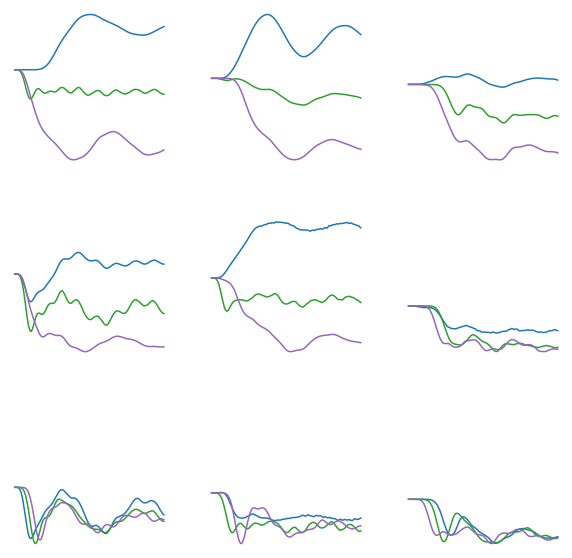

In [ ]:
# display neurons weights as time series
som_grid = plt.figure(figsize=(10, 10)) # width, height in inches
for i in range(map_wth*map_hgt):
    for k in range(map_dpt):
      sub = som_grid.add_subplot(map_wth, map_hgt, i+1)
      #image = weights[n].reshape([28,28]) # x_train[num] is the 784 normalized pixel values
      sub.set_axis_off()
      clr = sub.plot(range(800),weights[i+k*map_hgt*map_wth],i+k*map_hgt*map_wth+1)
plt.show()

##### Mapa 2 por 3 = 6 classes

In [ ]:
# -*- coding: utf-8 -*-

# ####################################################################################################
# GPU-based Self-Organizing-Map by Lyes Khacef.
# Reference: L. Khacef, V. Gripon, and B. Miramond, “GPU-based self-organizing-maps 
# for post-labeled few-shot unsupervised learning”, in International Conference On 
# Neural Information Processing (ICONIP), 2020.
# ####################################################################################################

# imports
#from imports import *
#from gpu_check import *
#from data_load import *
#from tf_ksom import *
#from label import *
#from test import *

# hyper-parameters
train_data = 60000
label_data = 600
test_data = 10000
input_dim = 800 #784
map_wth = 2
map_hgt = 3
class_nbr = 10
nbr_epochs = 40 # 20
eps_i_list = [1.0]
eps_f_list = [0.01]
eta_i_list = [10.0]
eta_f_list = [0.01]
sigma_kernel = 1.0

# GPU name
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    raise SystemError("GPU device not found!")
print('Found GPU at: {}'.format(device_name))

##
## So, what if theres not test data
##
# load dataset
# x_train, index_train, x_label, index_label, x_test, index_test, label_data = get_dataset(train_data, label_data, test_data)
index_train, x_label, index_label, x_test, index_test, label_data = False, False, False, False, False, False
x_train = npdf1

##
## how the hell
##
# false run_som(false, false, false, eta_f):
def run_som(eps_i, eps_f, eta_i, eta_f):
    print("\nHyper-parameters:   # eps_i = %f   # eps_f = %f   # eta_i = %f   # eta_f = %f" % (eps_i, eps_f, eta_i, eta_f))
    # train the network
    som = KSOM(map_wth, map_hgt, input_dim)
    start_time = timeit.default_timer()
    som.train(nbr_epochs, eps_i, eps_f, eta_i, eta_f, x_train, x_label, index_label, x_test, index_test)
    end_time = timeit.default_timer()
    print("\nSOM training time = ", end_time - start_time)
    weights = som.get_weights().numpy()

    # save the weights
    #np.save("weights/som_weights.npy", weights)
    
    ##
    ## Now you no label
    ##
    # label the network
    #neuron_label = labeling(label_data, class_nbr, weights, x_label, index_label, sigma_kernel)
    neuron_label = False

    ##
    ## Now you no accuracy
    # test the network
    #accuracy = test(class_nbr, weights, x_test, index_test, neuron_label, sigma_kernel)
    accuracy = False

    return weights, accuracy

# hyper-parameters grid search
hyper_param_list, accuracy_list = [], []
for eps_i in eps_i_list:
    for eps_f in eps_f_list:
        for eta_i in eta_i_list:
            for eta_f in eta_f_list:
                hyper_param_list.append([eps_i, eps_f, eta_i, eta_f])
                weights, accuracy = run_som(eps_i, eps_f, eta_i, eta_f)
                accuracy_list.append(accuracy)


Found GPU at: /device:GPU:0

Hyper-parameters:   # eps_i = 1.000000   # eps_f = 0.010000   # eta_i = 10.000000   # eta_f = 0.010000
---------- Epoch 1 ----------
---------- Epoch 2 ----------
---------- Epoch 3 ----------
---------- Epoch 4 ----------
---------- Epoch 5 ----------
---------- Epoch 6 ----------
---------- Epoch 7 ----------
---------- Epoch 8 ----------
---------- Epoch 9 ----------
---------- Epoch 10 ----------
---------- Epoch 11 ----------
---------- Epoch 12 ----------
---------- Epoch 13 ----------
---------- Epoch 14 ----------
---------- Epoch 15 ----------
---------- Epoch 16 ----------
---------- Epoch 17 ----------
---------- Epoch 18 ----------
---------- Epoch 19 ----------
---------- Epoch 20 ----------
---------- Epoch 21 ----------
---------- Epoch 22 ----------
---------- Epoch 23 ----------
---------- Epoch 24 ----------
---------- Epoch 25 ----------
---------- Epoch 26 ----------
---------- Epoch 27 ----------
---------- Epoch 28 ----------
---------

CPU RAM Free: 11.3 GB
GPU 0 ... Mem Free: 11166MB / 11441MB | Utilization   2%


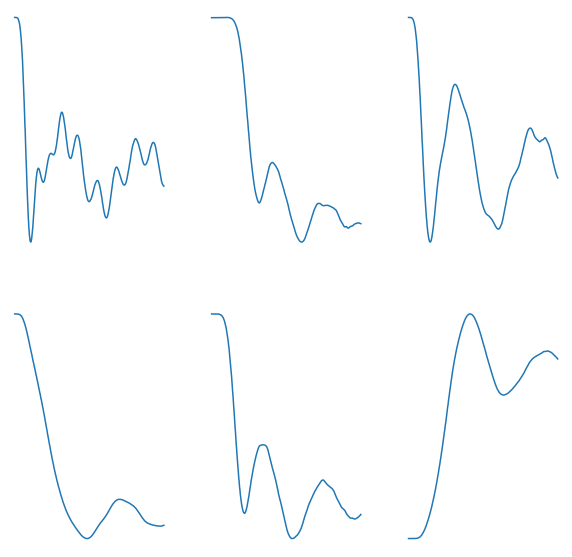

In [ ]:
## hyper parameters below 
## label list below

# GPU memory check
gpu_report()

# display neurons weights as mnist digits
som_grid = plt.figure(figsize=(10, 10)) # width, height in inches
for n in range(map_wth*map_hgt):
    ##
    ## Must make this into time series plot. Shouldnt be the thing
    ##
    #image = weights[n].reshape([28,28]) # x_train[num] is the 784 normalized pixel values
    sub = som_grid.add_subplot(map_wth, map_hgt, n + 1)
    sub.set_axis_off()
    clr = sub.plot(weights[n]) # imshow(image, cmap = plt.get_cmap("jet"), interpolation = "nearest")
    #plt.colorbar(clr)
#plt.savefig("plots/som_weights.png")
plt.show()

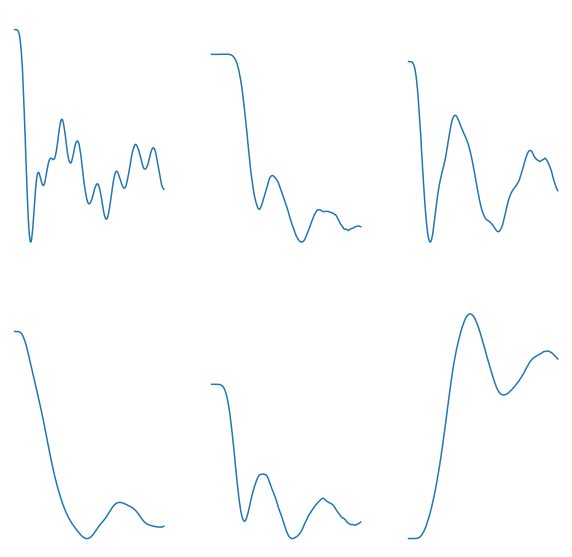

In [ ]:
# display neurons weights as time series
som_grid = plt.figure(figsize=(10, 10)) # width, height in inches
for i in range(map_wth*map_hgt):
    #for k in range(map_dpt):
    sub = som_grid.add_subplot(map_wth, map_hgt, i+1)
    #image = weights[n].reshape([28,28]) # x_train[num] is the 784 normalized pixel values
    sub.set_axis_off()
    clr = sub.plot(range(800),weights[i],i+1)
plt.show()

##### Mapa 2 por 2 = 4 classes

In [ ]:
# -*- coding: utf-8 -*-

# ####################################################################################################
# GPU-based Self-Organizing-Map by Lyes Khacef.
# Reference: L. Khacef, V. Gripon, and B. Miramond, “GPU-based self-organizing-maps 
# for post-labeled few-shot unsupervised learning”, in International Conference On 
# Neural Information Processing (ICONIP), 2020.
# ####################################################################################################

# imports
#from imports import *
#from gpu_check import *
#from data_load import *
#from tf_ksom import *
#from label import *
#from test import *

# hyper-parameters
train_data = 60000
label_data = 600
test_data = 10000
input_dim = 800 #784
map_wth = 2
map_hgt = 2
class_nbr = 10
nbr_epochs = 40 # 20
eps_i_list = [1.0]
eps_f_list = [0.01]
eta_i_list = [10.0]
eta_f_list = [0.01]
sigma_kernel = 1.0

# GPU name
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    raise SystemError("GPU device not found!")
print('Found GPU at: {}'.format(device_name))

##
## So, what if theres not test data
##
# load dataset
# x_train, index_train, x_label, index_label, x_test, index_test, label_data = get_dataset(train_data, label_data, test_data)
index_train, x_label, index_label, x_test, index_test, label_data = False, False, False, False, False, False
x_train = npdf1

##
## make the ref from outside scope
##
som = []

##
## how the hell
##
# false run_som(false, false, false, eta_f):
def run_som(eps_i, eps_f, eta_i, eta_f):
    print("\nHyper-parameters:   # eps_i = %f   # eps_f = %f   # eta_i = %f   # eta_f = %f" % (eps_i, eps_f, eta_i, eta_f))
    # train the network
    som = KSOM(map_wth, map_hgt, input_dim)
    start_time = timeit.default_timer()
    som.train(nbr_epochs, eps_i, eps_f, eta_i, eta_f, x_train, x_label, index_label, x_test, index_test)
    end_time = timeit.default_timer()
    print("\nSOM training time = ", end_time - start_time)
    weights = som.get_weights().numpy()

    # save the weights
    #np.save("weights/som_weights.npy", weights)
    
    ##
    ## Now you no label
    ##
    # label the network
    #neuron_label = labeling(label_data, class_nbr, weights, x_label, index_label, sigma_kernel)
    neuron_label = False

    ##
    ## Now you no accuracy
    # test the network
    #accuracy = test(class_nbr, weights, x_test, index_test, neuron_label, sigma_kernel)
    accuracy = False

    return weights, accuracy

# hyper-parameters grid search
hyper_param_list, accuracy_list = [], []
for eps_i in eps_i_list:
    for eps_f in eps_f_list:
        for eta_i in eta_i_list:
            for eta_f in eta_f_list:
                hyper_param_list.append([eps_i, eps_f, eta_i, eta_f])
                weights, accuracy = run_som(eps_i, eps_f, eta_i, eta_f)
                accuracy_list.append(accuracy)


Found GPU at: /device:GPU:0

Hyper-parameters:   # eps_i = 1.000000   # eps_f = 0.010000   # eta_i = 10.000000   # eta_f = 0.010000
---------- Epoch 1 ----------
---------- Epoch 2 ----------
---------- Epoch 3 ----------
---------- Epoch 4 ----------
---------- Epoch 5 ----------
---------- Epoch 6 ----------
---------- Epoch 7 ----------
---------- Epoch 8 ----------
---------- Epoch 9 ----------
---------- Epoch 10 ----------
---------- Epoch 11 ----------
---------- Epoch 12 ----------
---------- Epoch 13 ----------
---------- Epoch 14 ----------
---------- Epoch 15 ----------
---------- Epoch 16 ----------
---------- Epoch 17 ----------
---------- Epoch 18 ----------
---------- Epoch 19 ----------
---------- Epoch 20 ----------
---------- Epoch 21 ----------
---------- Epoch 22 ----------
---------- Epoch 23 ----------
---------- Epoch 24 ----------
---------- Epoch 25 ----------
---------- Epoch 26 ----------
---------- Epoch 27 ----------
---------- Epoch 28 ----------
---------

CPU RAM Free: 11.3 GB
GPU 0 ... Mem Free: 11166MB / 11441MB | Utilization   2%


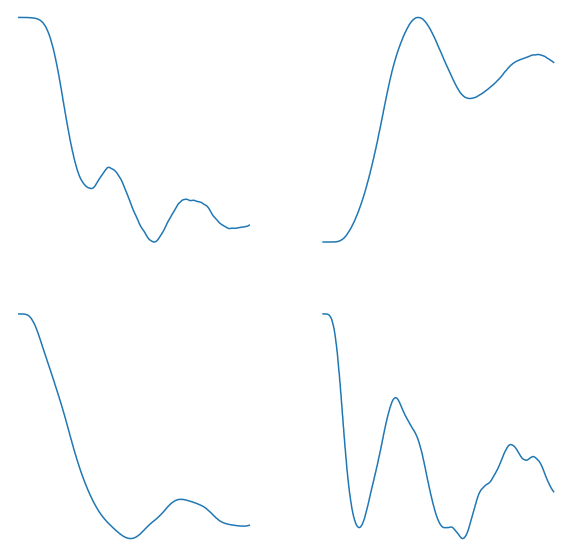

In [ ]:
## hyper parameters below 
## label list below

# GPU memory check
gpu_report()

# display neurons weights as mnist digits
som_grid = plt.figure(figsize=(10, 10)) # width, height in inches
for n in range(map_wth*map_hgt):
    ##
    ## Must make this into time series plot. Shouldnt be the thing
    ##
    #image = weights[n].reshape([28,28]) # x_train[num] is the 784 normalized pixel values
    sub = som_grid.add_subplot(map_wth, map_hgt, n + 1)
    sub.set_axis_off()
    clr = sub.plot(weights[n]) # imshow(image, cmap = plt.get_cmap("jet"), interpolation = "nearest")
    #plt.colorbar(clr)
#plt.savefig("plots/som_weights.png")
#plt.show()

##### Mapa 2 por 2 por 2 = 8 classes

In [ ]:
# -*- coding: utf-8 -*-

# ####################################################################################################
# GPU-based Self-Organizing-Map by Lyes Khacef.
# Reference: L. Khacef, V. Gripon, and B. Miramond, “GPU-based self-organizing-maps 
# for post-labeled few-shot unsupervised learning”, in International Conference On 
# Neural Information Processing (ICONIP), 2020.
# ####################################################################################################

# imports
#from imports import *
#from gpu_check import *
#from data_load import *
#from tf_ksom import *
#from label import *
#from test import *

# hyper-parameters
train_data = 60000
label_data = 600
test_data = 10000
input_dim = 800 #784
map_wth = 2
map_hgt = 2
map_dpt = 2
class_nbr = 10
nbr_epochs = 40 # 20
eps_i_list = [1.0]
eps_f_list = [0.01]
eta_i_list = [10.0]
eta_f_list = [0.01]
sigma_kernel = 1.0

# GPU name
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    raise SystemError("GPU device not found!")
print('Found GPU at: {}'.format(device_name))

##
## So, what if theres not test data
##
# load dataset
# x_train, index_train, x_label, index_label, x_test, index_test, label_data = get_dataset(train_data, label_data, test_data)
index_train, x_label, index_label, x_test, index_test, label_data = False, False, False, False, False, False
x_train = npdf1

##
## make the ref from outside scope
##
som = []

##
## how the hell
##
# false run_som(false, false, false, eta_f):
def run_som(eps_i, eps_f, eta_i, eta_f):
    print("\nHyper-parameters:   # eps_i = %f   # eps_f = %f   # eta_i = %f   # eta_f = %f" % (eps_i, eps_f, eta_i, eta_f))
    # train the network
    som = KSOM_3D(map_wth, map_hgt, map_dpt, input_dim)
    start_time = timeit.default_timer()
    som.train(nbr_epochs, eps_i, eps_f, eta_i, eta_f, x_train, x_label, index_label, x_test, index_test)
    end_time = timeit.default_timer()
    print("\nSOM training time = ", end_time - start_time)
    weights = som.get_weights().numpy()

    # save the weights
    #np.save("weights/som_weights.npy", weights)
    
    ##
    ## Now you no label
    ##
    # label the network
    #neuron_label = labeling(label_data, class_nbr, weights, x_label, index_label, sigma_kernel)
    neuron_label = False

    ##
    ## Now you no accuracy
    # test the network
    #accuracy = test(class_nbr, weights, x_test, index_test, neuron_label, sigma_kernel)
    accuracy = False

    return weights, accuracy

# hyper-parameters grid search
hyper_param_list, accuracy_list = [], []
for eps_i in eps_i_list:
    for eps_f in eps_f_list:
        for eta_i in eta_i_list:
            for eta_f in eta_f_list:
                hyper_param_list.append([eps_i, eps_f, eta_i, eta_f])
                weights, accuracy = run_som(eps_i, eps_f, eta_i, eta_f)
                accuracy_list.append(accuracy)


Found GPU at: /device:GPU:0

Hyper-parameters:   # eps_i = 1.000000   # eps_f = 0.010000   # eta_i = 10.000000   # eta_f = 0.010000
---------- Epoch 1 ----------
---------- Epoch 2 ----------
---------- Epoch 3 ----------
---------- Epoch 4 ----------
---------- Epoch 5 ----------
---------- Epoch 6 ----------
---------- Epoch 7 ----------
---------- Epoch 8 ----------
---------- Epoch 9 ----------
---------- Epoch 10 ----------
---------- Epoch 11 ----------
---------- Epoch 12 ----------
---------- Epoch 13 ----------
---------- Epoch 14 ----------
---------- Epoch 15 ----------
---------- Epoch 16 ----------
---------- Epoch 17 ----------
---------- Epoch 18 ----------
---------- Epoch 19 ----------
---------- Epoch 20 ----------
---------- Epoch 21 ----------
---------- Epoch 22 ----------
---------- Epoch 23 ----------
---------- Epoch 24 ----------
---------- Epoch 25 ----------
---------- Epoch 26 ----------
---------- Epoch 27 ----------
---------- Epoch 28 ----------
---------

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future

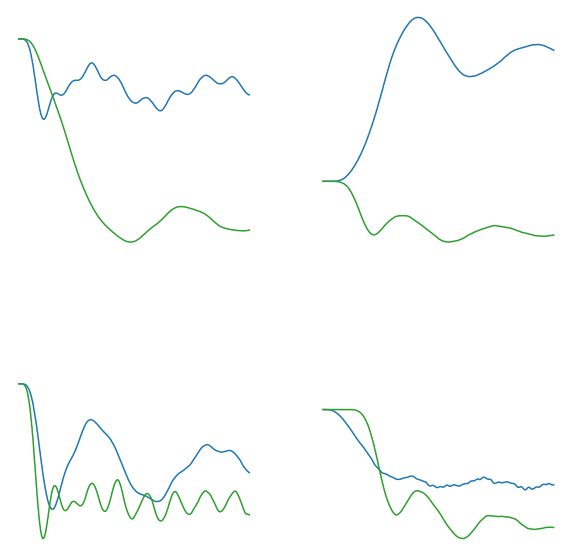

In [ ]:
# display neurons weights as time series
som_grid = plt.figure(figsize=(10, 10)) # width, height in inches
for i in range(map_wth*map_hgt):
  for k in range(map_dpt):
    sub = som_grid.add_subplot(map_wth, map_hgt, i+1)
    #image = weights[n].reshape([28,28]) # x_train[num] is the 784 normalized pixel values
    sub.set_axis_off()
    clr = sub.plot(range(800),weights[i+k*map_wth*map_hgt],i+k*map_wth*map_hgt+1)
plt.show()

Certo... analisando rapidamente... 

<table>
  <tr>
    <td>
      1,1, azul eh 0-ply e verde 90-ply
    </td>
    <td>
      1,2, azul eh 0-ply e verde 90-ply
    </td>
  </tr>

  <tr>
    <td>
      2,1, azul eh +-45-ply e verde 0-ply<br>
      ou<br>
      2,1, azul eh 90-ply invertido e verrde eh +-45-ply
    </td>
    <td>
      2,2, azul eh 0-ply e verde +-45-ply
    </td>
  </tr>
</table>

... mas estes dados logo aqui em cima eram referentes aos outros casos de carga e laminados e dados.

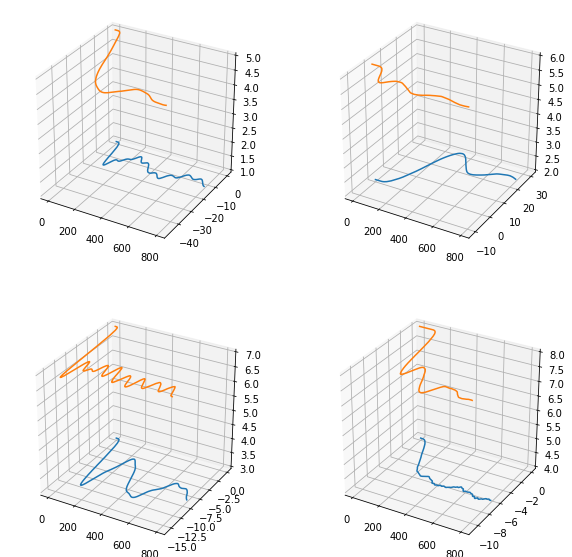

In [ ]:
# display neurons weights as time series
som_grid = plt.figure(figsize=(10, 10)) # width, height in inches
for i in range(map_wth*map_hgt):
    sub = som_grid.add_subplot(map_wth, map_hgt, i+1,projection='3d')
    for k in range(map_dpt):
        #image = weights[n].reshape([28,28]) # x_train[num] is the 784 normalized pixel values
        #sub.set_axis_off()
        clr = sub.plot(range(800),weights[i+k*map_wth*map_hgt],i+k*map_wth*map_hgt+1)
plt.show()

In [ ]:
weights.shape

(6, 800)

### 4. Unified Distance Matrix

Copiei do github dtwsom

In [ ]:
"""Returns the distance map of the weights.
Each cell is the normalised sum of the distances between
a neuron and its neighbours."""
um = np.zeros((weights.shape[0], weights.shape[1])) # 8 e 800 p/ som 2x2x2
it = nditer(um, flags=['multi_index'])
while not it.finished:
    for ii in range(it.multi_index[0]-1, it.multi_index[0]+2):
        for jj in range(it.multi_index[1]-1, it.multi_index[1]+2):
            if (ii >= 0 and ii < self._weights.shape[0] and
                    jj >= 0 and jj < self._weights.shape[1]):
                w_1 = self._weights[ii, jj, :]
                w_2 = self._weights[it.multi_index]
                um[it.multi_index] += fast_norm(w_1-w_2)
    it.iternext()
um = um/um.max()

In [ ]:
um = np.zeros((rweights.shape[0], rweights.shape[1])) # 8 e 800 p/ som 2x2x2


In [ ]:
it = np.nditer(um, flags=['multi_index'])


In [ ]:
weights.shape

(6, 800)

In [ ]:
## usando pra transplantar acima
rweights = weights.reshape(3,2,800)
um = np.zeros((rweights.shape[0], rweights.shape[1])) # 8 e 800 p/ som 2x2x2
it = np.nditer(um, flags=['multi_index'])

Caracolis mto manero essa parada de multiindex iter ahazantchis

In [ ]:
while not it.finished:
    for ii in range(it.multi_index[0]-1, it.multi_index[0]+2):
        for jj in range(it.multi_index[1]-1, it.multi_index[1]+2):
            if (ii >= 0 and ii < rweights.shape[0] and
                    jj >= 0 and jj < rweights.shape[1]):
                w_1 = rweights[ii, jj, :]
                w_2 = rweights[it.multi_index]
                um[it.multi_index] += np.sqrt(np.dot(w_1-w_2,(w_1-w_2).T))
    it.iternext()

In [ ]:
um = um/um.max()

In [ ]:
um

array([[0.21145406, 0.22885019],
       [0.39688949, 1.        ],
       [0.35034547, 0.66236602]])

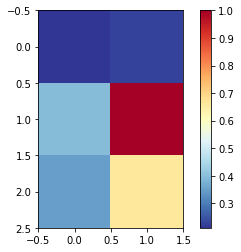

In [ ]:
plt.imshow(um, cmap=plt.cm.get_cmap('RdYlBu_r'), alpha=1)
plt.colorbar()

In [ ]:
def _check_input_len(il, data):
    """Checks that the data in input is of the correct shape."""
    data_len = len(data[0])
    if il != data_len:
        msg = 'Received %d features, expected %d.' % (data_len,
                                                      self._input_len)
        raise ValueError(msg)

Winner Matrix

In [ ]:
def activate(x):
    """Updates matrix activation_map, in this matrix
        the element i,j is the response of the neuron i,j to x."""
    s = np.subtract(x, rweights)  # x - w
    activation_map = np.linalg.norm(s, axis=-1)

#def activate(self, x):
    """Returns the activation map to x."""
    # activate(x)
    return activation_map

In [ ]:
def winner(x):
    """Computes the coordinates of the winning neuron for the sample x."""
    am = activate(x)
    return np.unravel_index(am.argmin(), am.shape)

In [ ]:
npdf1.shape

(2561, 800)

In [ ]:
from collections import defaultdict

In [ ]:
"""Returns a dictionary wm where wm[(i,j)] is a list
with all the patterns that have been mapped in the position i,j."""
# _check_input_len(data)
winmap = defaultdict(list)
for x in npdf1:
    winmap[winner(x)].append(x)


In [ ]:
winmap.keys()

dict_keys([(0, 1), (1, 0), (2, 0), (1, 1), (0, 0), (2, 1)])

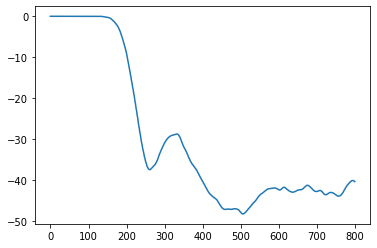

In [ ]:
plt.plot(winmap[(1,1)][0])

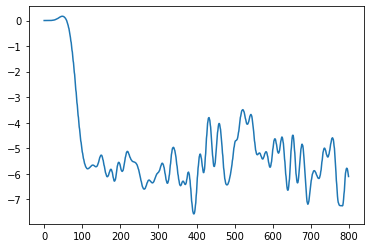

In [ ]:
plt.plot(winmap[(0,1)][1])

i = 0 j =0
i = 0 j =1
i = 0 j =2
i = 1 j =0
i = 1 j =1
i = 1 j =2


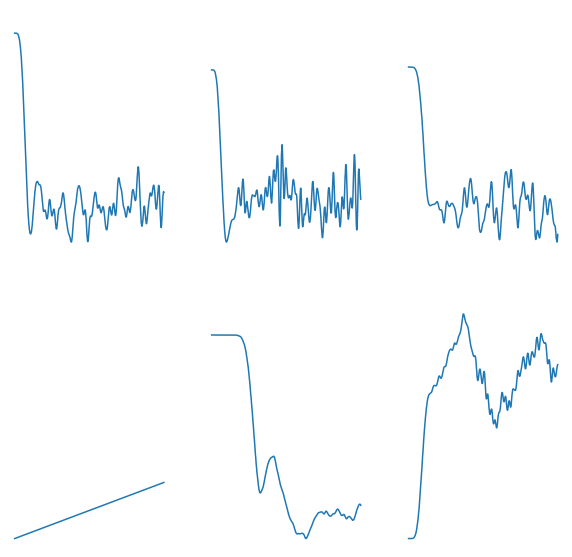

In [ ]:
# display neurons weights as time series
map_wth=2
map_hgt=3
som_grid = plt.figure(figsize=(10, 10)) # width, height in inches
for i in range(map_wth):
  for j in range(map_hgt):
    #for k in range(map_dpt):
    sub = som_grid.add_subplot(map_wth, map_hgt, 3*i+j+1)
    #image = weights[n].reshape([28,28]) # x_train[num] is the 784 normalized pixel values
    sub.set_axis_off()
    print("i = "+str(i)+" j ="+str(j))
    clr = sub.plot(range(800),winmap[(j,i)][0],3*i+j+1)
plt.show()

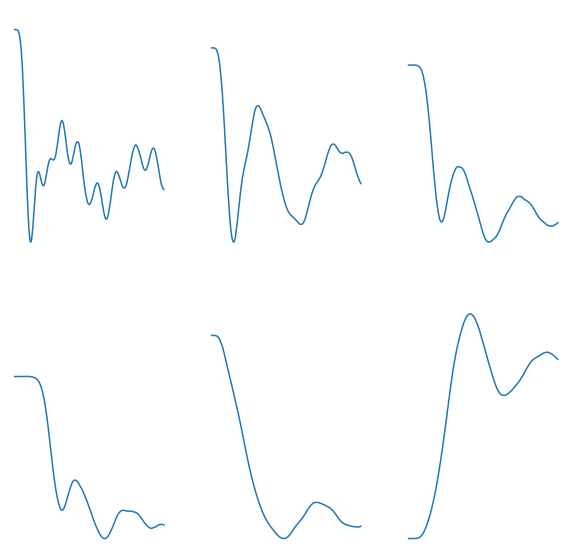

In [ ]:
# display neurons weights as time series
map_wth=2
map_hgt=3
som_grid = plt.figure(figsize=(10, 10)) # width, height in inches
contagem = np.zeros((map_wth,map_hgt))
for i in range(map_wth):
  for j in range(map_hgt):
    #for k in range(map_dpt):
    sub = som_grid.add_subplot(map_wth, map_hgt, 3*i+j+1)
    #image = weights[n].reshape([28,28]) # x_train[num] is the 784 normalized pixel values
    sub.set_axis_off()
    # print("i = "+str(i)+" j ="+str(j))
    # try to average out all npdf1 appended to each winning neuron
    itemizado = winmap[(j,i)]
    # fazer a contagem
    contagem[i,j] = len(winmap[(j,i)])
    # print("Temos "+str(len(itemizado))+" series que sao vencidas neste neuronio.")
    # print("Tentando fazer media")
    # print("itemizado"+str(np.asarray(itemizado).shape))
    serie_media = np.average(np.asarray(itemizado),0)
    # print(serie_media)
    clr = sub.plot(range(800),serie_media,3*i+j+1)
plt.show()

In [ ]:
contagem

array([[150., 408., 718.],
       [773., 256., 256.]])

In [ ]:
print(contagem)

[[150. 408. 718.]
 [773. 256. 256.]]


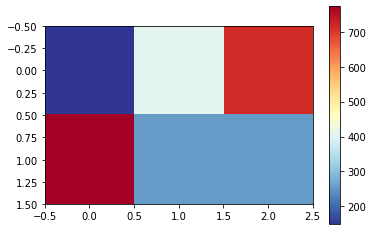

In [ ]:
plt.imshow(contagem, cmap=plt.cm.get_cmap('RdYlBu_r'), alpha=1)
plt.colorbar()


Na verdade, estou mostrando uma copia do primeiro neuronio vencedor adicionado, correto?

In [ ]:
## hyper parameters below 
## label list below

# GPU memory check
gpu_report()

# display neurons weights as mnist digits
som_grid = plt.figure(figsize=(10, 10)) # width, height in inches
for n in range(map_wth*map_hgt):
    ##
    ## Must make this into time series plot. Shouldnt be the thing
    ##
    #image = weights[n].reshape([28,28]) # x_train[num] is the 784 normalized pixel values
    sub = som_grid.add_subplot(map_wth, map_hgt, n + 1)
    sub.set_axis_off()
    clr = sub.plot(weights[n]) # imshow(image, cmap = plt.get_cmap("jet"), interpolation = "nearest")
    #plt.colorbar(clr)
#plt.savefig("plots/som_weights.png")
plt.show()

In [ ]:
plt.savefig("plots/som_weights.png")

In [ ]:

# best hyper-parameters
best_accuracy = np.max(accuracy_list)
best_hyper_param = hyper_param_list[np.argmax(accuracy_list)]
print("Best accuracy = ", best_accuracy)
print("Best hyper-parameters:   # eps_i = %f   # eps_f = %f   # sig_i = %f   # sig_f = %f" % (best_hyper_param[0], best_hyper_param[1], best_hyper_param[2], best_hyper_param[3]))


In [ ]:
label_list = [label_data]
for label_data in label_list:
    print("\n---------- Labels = %d ----------" % label_data)
    run_labeling(weights, label_data, x_train, index_train, x_test, index_test)

In [ ]:
    def labels_map(self, data, labels):
        """Returns a dictionary wm where wm[(i,j)] is a dictionary
        that contains the number of samples from a given label
        that have been mapped in position i,j.
        Parameters
        ----------
        data : np.array or list
            Data matrix.
        label : np.array or list
            Labels for each sample in data.
        """
        self._check_input_len(data)
        if not len(data) == len(labels):
            raise ValueError('data and labels must have the same length.')
        winmap = defaultdict(list)
        for x, l in zip(data, labels):
            winmap[self.winner(x)].append(l)
        for position in winmap:
            winmap[position] = Counter(winmap[position])
        return winmap